# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\begin{multline*}
d_w Q = dx_w[(y - Xw)^T(y - Xw)] =  d_w[(y - Xw)^T] (y - Xw) + (y - Xw)^Td_w[(y - Xw)]  = d_w[(-Xw)^T] (y - Xw) - (y - Xw)^TXdw =  - dw^T X^T (y - Xw) - (y - Xw)^TXdw = -2 (y - Xw)^TX dw.
\end{multline*}$$

Значит градиент - это $\nabla_{w}Q = \frac{-2}{l} X^T (y - Xw)$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/94508912/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/94508466/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/95355293/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/95355347/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/95355648/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

<Axes: xlabel='price', ylabel='Count'>

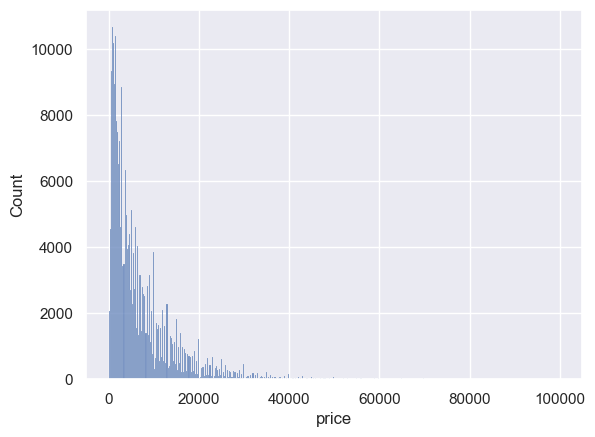

In [9]:
sns.histplot(data['price'])

<Axes: xlabel='price', ylabel='Count'>

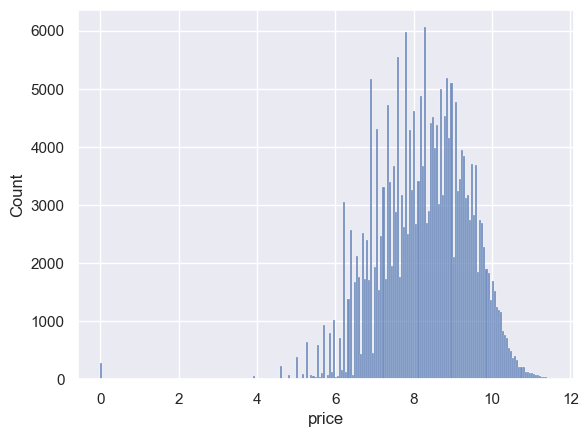

In [10]:
sns.histplot(np.log(data['price']))

In [11]:
data['log_price'] = np.log1p(data['price'])

<Axes: ylabel='log_price'>

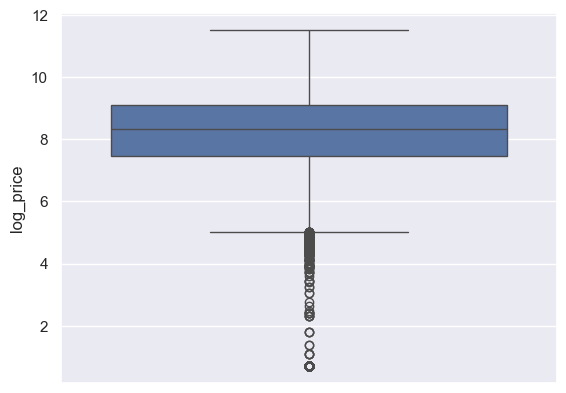

In [12]:
sns.boxplot(data['log_price'])

In [13]:
data = data[data['log_price'] >= 5]
data

brand        model vehicleType    gearbox fuelType  \
0       volkswagen         golf  kleinwagen    manuell   benzin   
1            skoda        fabia  kleinwagen    manuell   diesel   
2              bmw          3er   limousine    manuell   benzin   
3          peugeot      2_reihe      cabrio    manuell   benzin   
4            mazda      3_reihe   limousine    manuell   benzin   
...            ...          ...         ...        ...      ...   
241185  volkswagen         golf   limousine    manuell   diesel   
241186        seat         leon   limousine    manuell   benzin   
241187       smart       fortwo      cabrio  automatik   benzin   
241188  volkswagen  transporter         bus    manuell   diesel   
241189         bmw      m_reihe   limousine    manuell   benzin   

       notRepairedDamage  powerPS  kilometer  autoAgeMonths  price  log_price  
0                   nein       75     150000            177   1500   7.313887  
1                   nein       69      90000             93   3600   8.188967  
2                     ja      102     150000            246    650   6.478510  
3                   nein      109     150000            140   2200   7.696667  
4                   nein      105     150000            136   2000   7.601402  
...                  ...      ...        ...            ...    ...        ...  
241185              nein      140     150000             69   7900   8.974745  
241186                ja      225     150000            142   3200   8.071219  
241187              nein      101     125000            192   1199   7.090077  
241188              nein      102     150000            241   9200   9.127067  
241189              nein      320      50000             31  28990  10.274741  

[240411 rows x 11 columns]

In [14]:
data.describe()

powerPS      kilometer  autoAgeMonths          price  \
count  240411.000000  240411.000000  240411.000000  240411.000000   
mean      131.382312  123729.945801     144.544480    6909.866799   
std        60.628496   39830.846479      73.028833    8028.007837   
min        51.000000    5000.000000       1.000000     149.000000   
25%        90.000000  100000.000000      92.000000    1799.000000   
50%       120.000000  150000.000000     140.000000    4190.000000   
75%       160.000000  150000.000000     192.000000    8999.000000   
max       589.000000  150000.000000     600.000000   99999.000000   

           log_price  
count  240411.000000  
mean        8.282659  
std         1.111713  
min         5.010635  
25%         7.495542  
50%         8.340695  
75%         9.104980  
max        11.512925

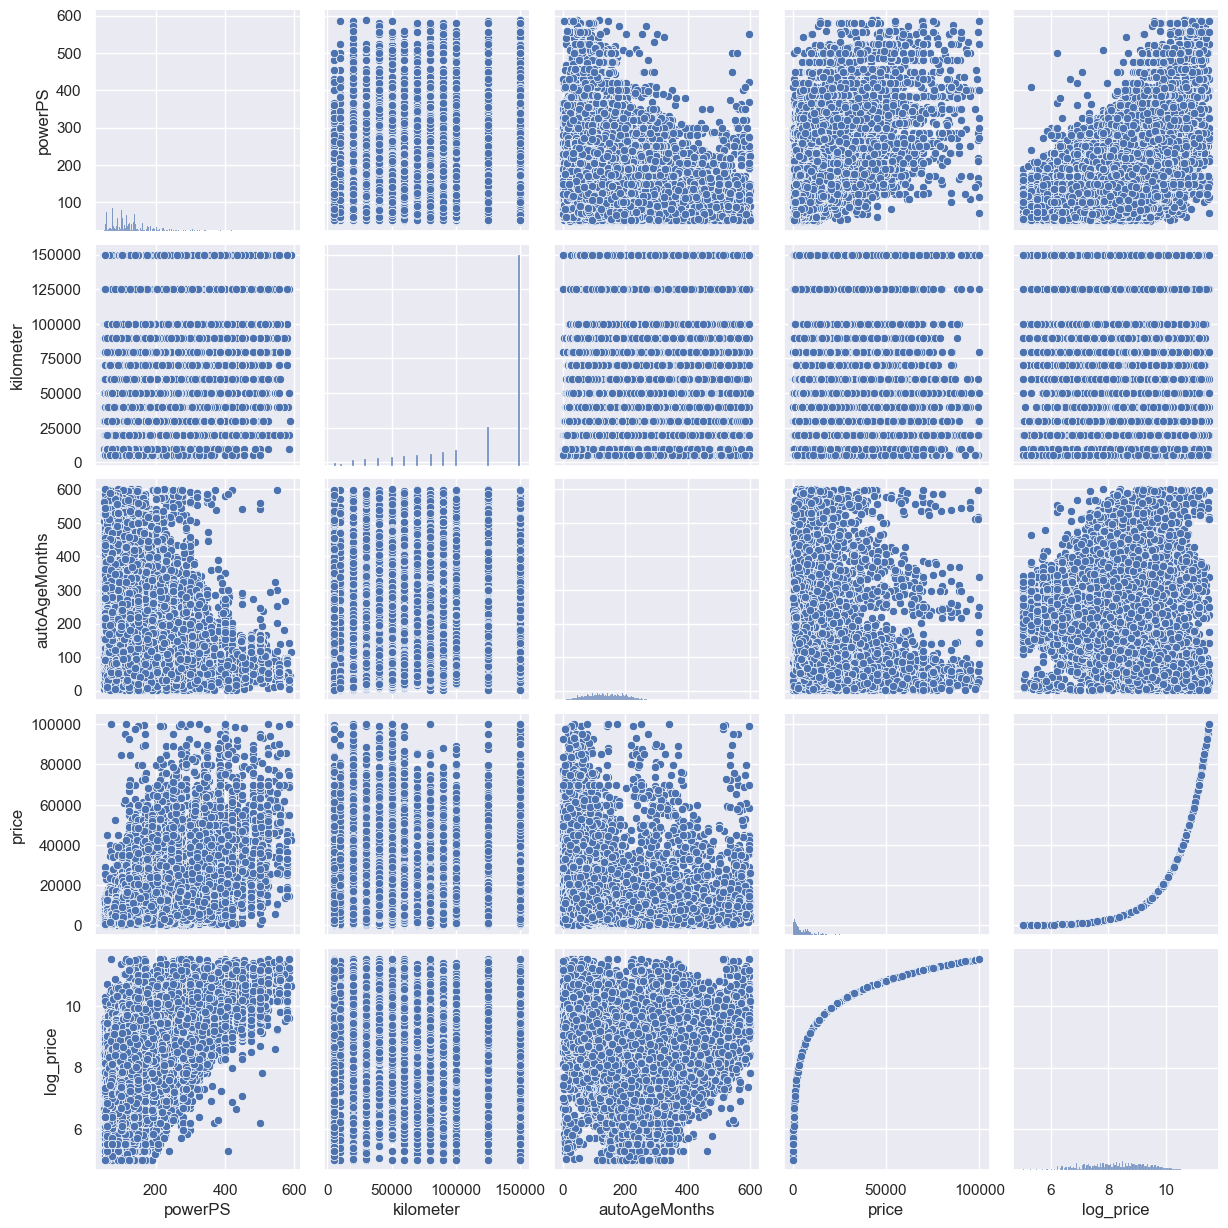

In [15]:
sns.pairplot(data)

Посмотрим зависимость целевой переменной от признака

Text(0, 0.5, 'brand')

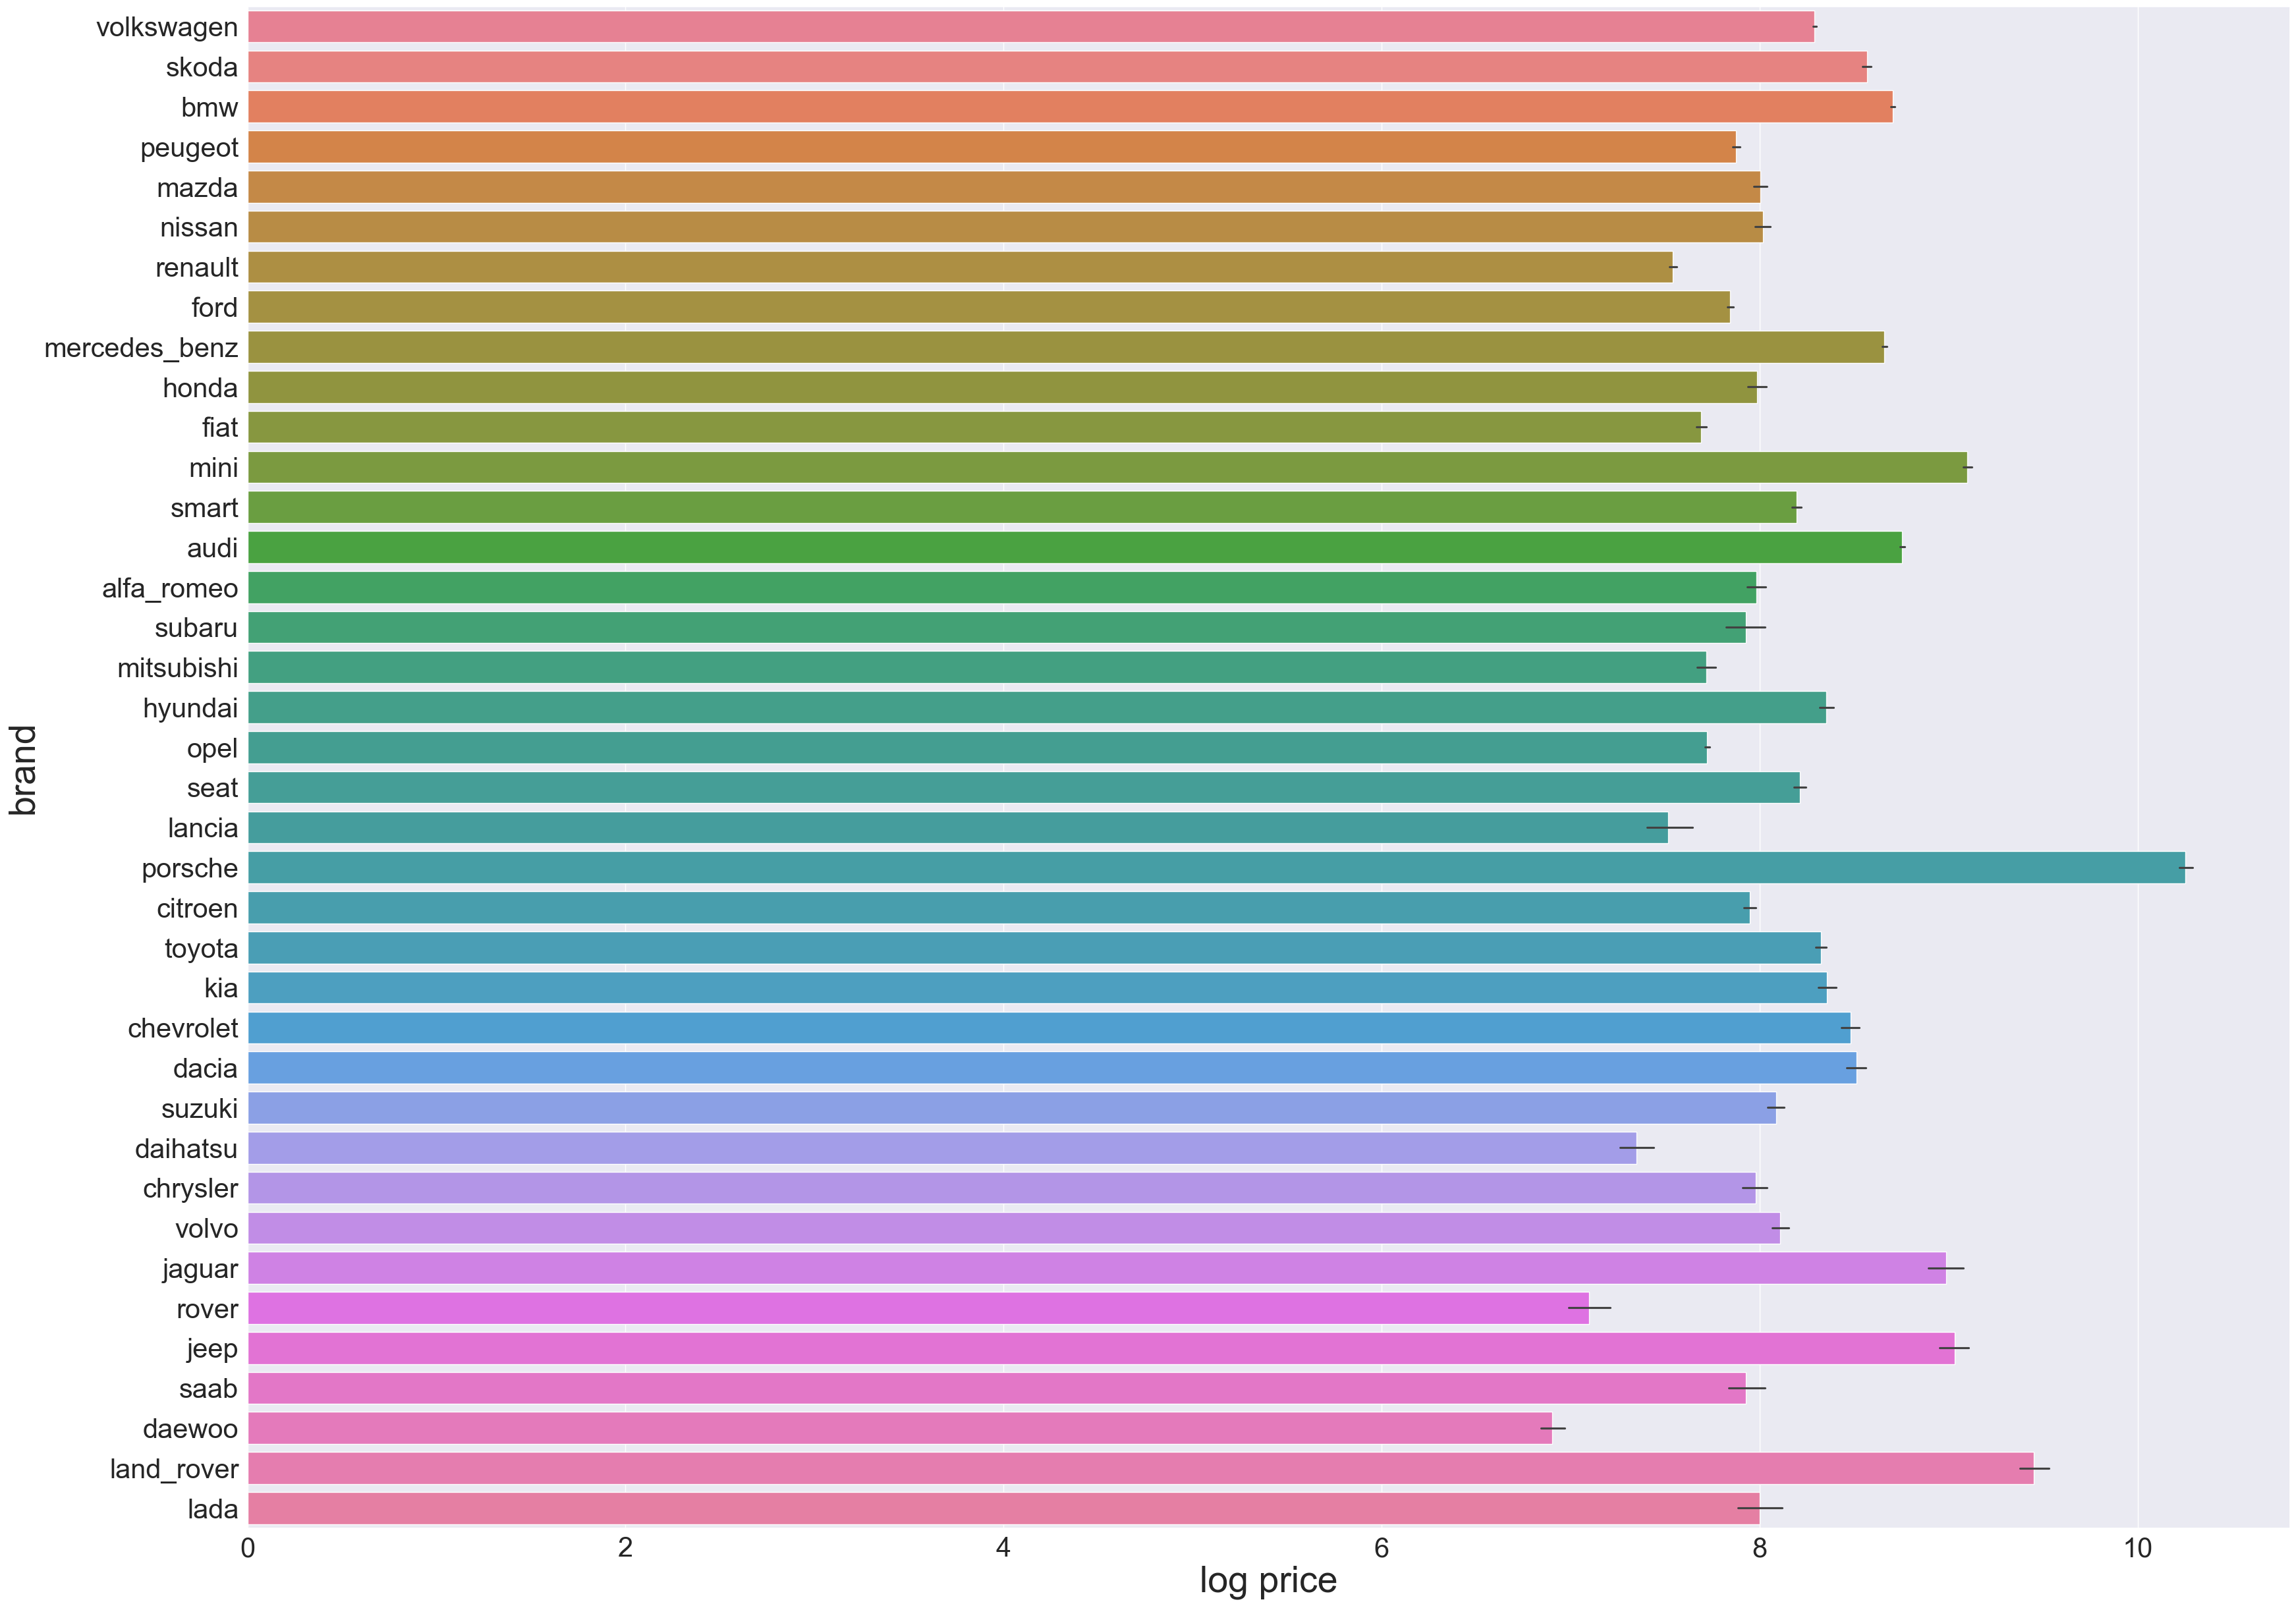

In [16]:
fig = plt.figure(figsize=(40, 30))
ax = sns.barplot(data, x = data['log_price'], y=data['brand'], hue=data['brand'])
ax.tick_params(labelsize=30)
ax.set_xlabel("log price",fontsize=40)
ax.set_ylabel("brand",fontsize=40)

Text(0, 0.5, 'model')

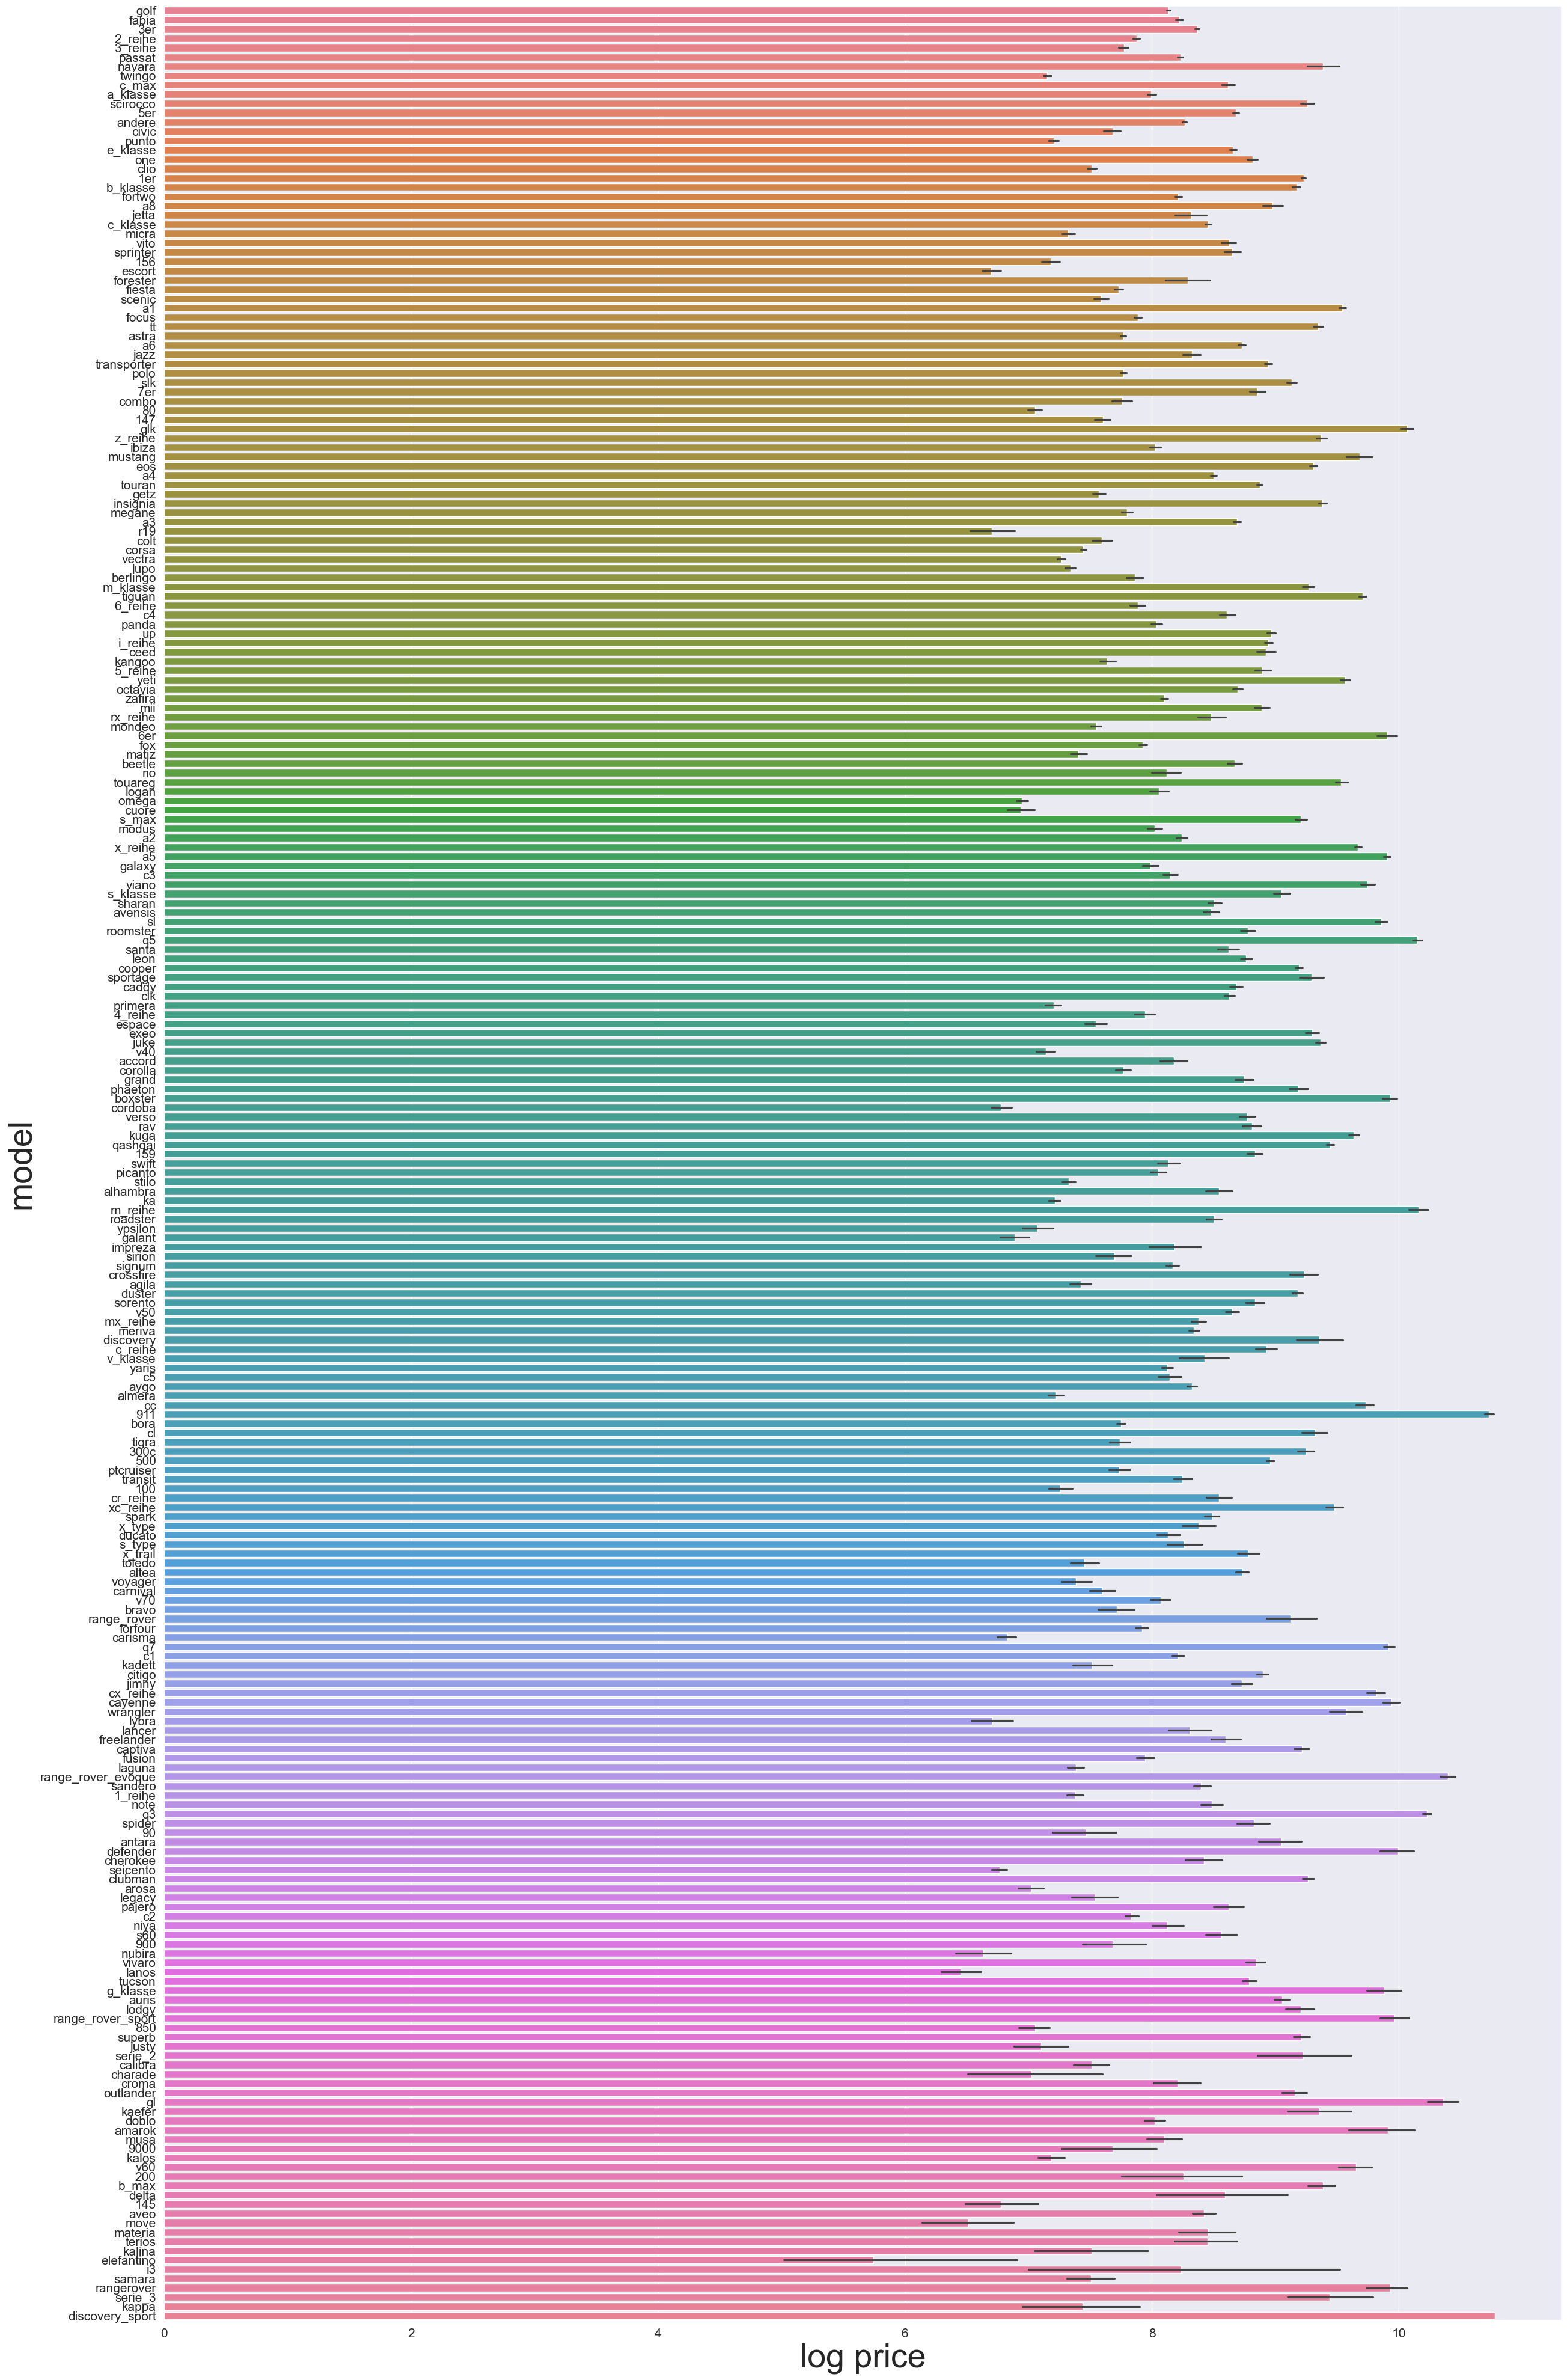

In [17]:
fig = plt.figure(figsize=(30, 50))
ax = sns.barplot(data, x = data['log_price'], y=data['model'], hue=data['model'])
ax.tick_params(labelsize=15)
ax.set_xlabel("log price",fontsize=40)
ax.set_ylabel("model",fontsize=40)

In [18]:
data['vehicleType'].nunique()

8

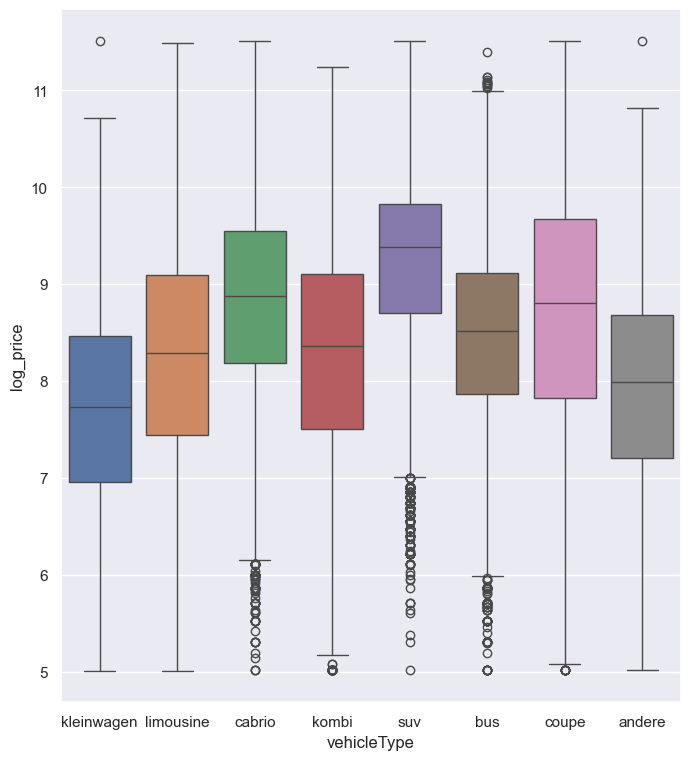

In [19]:
fig = plt.figure(figsize=(8, 9))

ax = sns.boxplot(data, x = data['vehicleType'], y=data['log_price'], hue=data['vehicleType'])

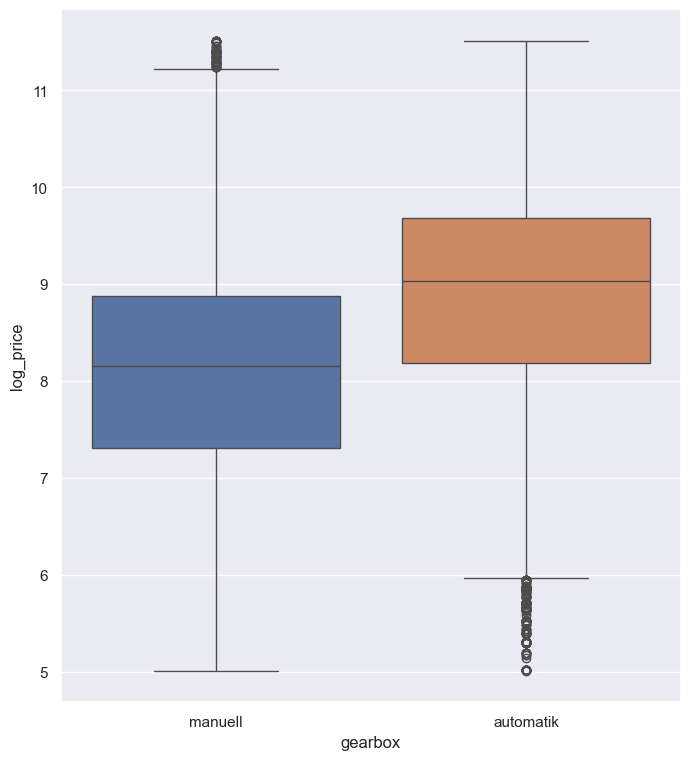

In [20]:
fig = plt.figure(figsize=(8, 9))

ax = sns.boxplot(data, x = data['gearbox'], y=data['log_price'], hue=data['gearbox'])

Логично, что автоматическая коробка передач стоит дороже, но у механической коробки есть выбросы сверху, что соответсвует ретро автомобилям

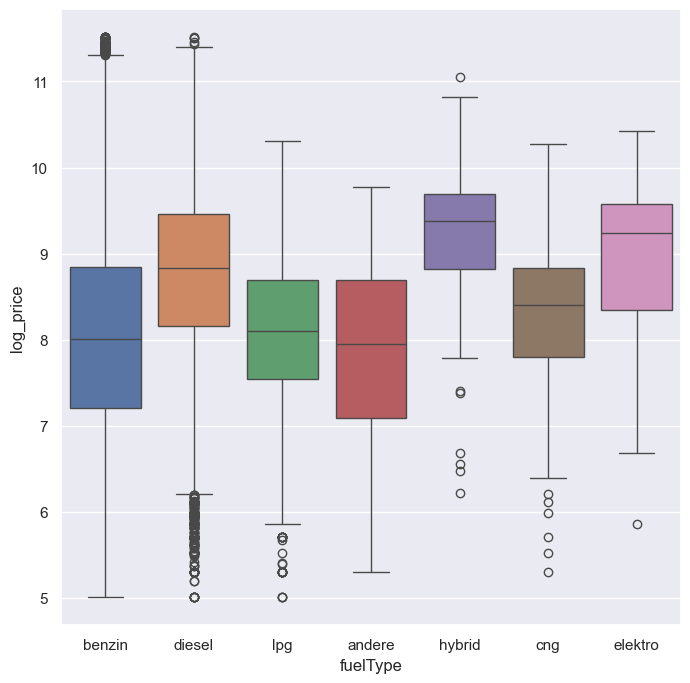

In [21]:
fig = plt.figure(figsize=(8, 8))

ax = sns.boxplot(data, x = data['fuelType'], y=data['log_price'], hue=data['fuelType'])

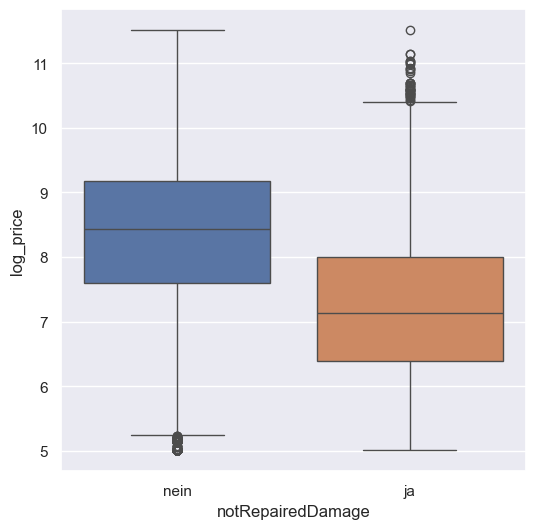

In [22]:
fig = plt.figure(figsize=(6, 6))

ax = sns.boxplot(data, x = data['notRepairedDamage'], y=data['log_price'], hue=data['notRepairedDamage'])


Логично, что небитые машины стоят дороже

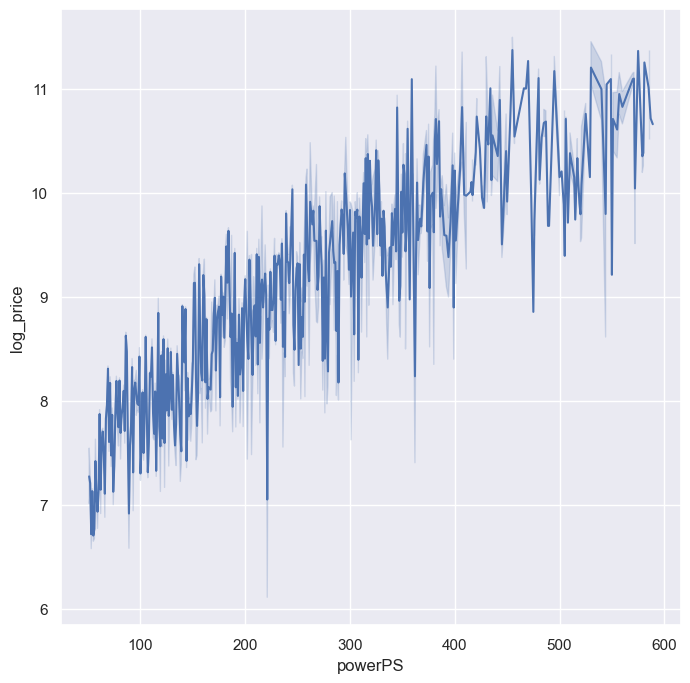

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = sns.lineplot(data, x=data['powerPS'], y=data['log_price'])

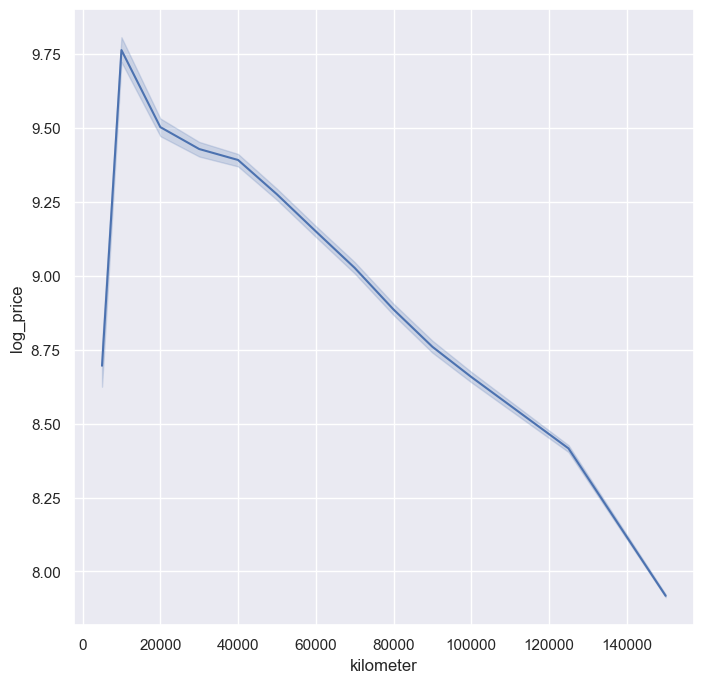

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = sns.lineplot(data, x=data['kilometer'], y=data['log_price'])

Здесь прослеживается явная зависимость, что если у машины очень большой пробег, то цена становится все меньше и меньше

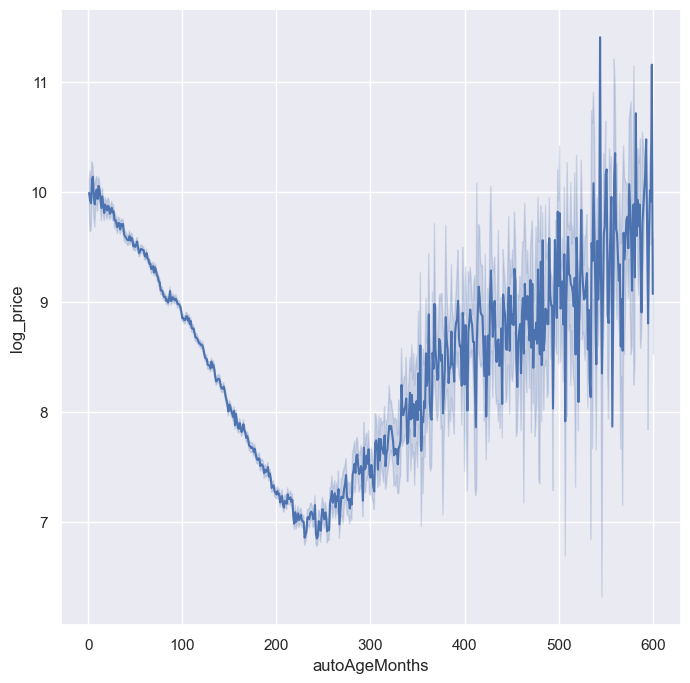

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = sns.lineplot(data, x=data['autoAgeMonths'], y=data['log_price'])


Здесь тоже видна зависимость, сначала цена машины падает, если возраст растет, а потом начинает расти, потому что всякие ретро машины стоят дорого и чем старше ретро машина, тем она дороже. 

Теперь выбросим выбросы из части категориальных и численных признаков

In [26]:
data = data[((data['vehicleType']=='cabrio') & (data['log_price'] >= 6.2)) \
            | ((data['vehicleType']=='kombi') & (data['log_price'] >= 5.2)) \
            | ((data['vehicleType']=='bus') & (data['log_price'] >= 6) & (data['log_price'] <= 11) )\
            | (data['vehicleType'] == 'kleinwagen') | (data['vehicleType'] == 'limousine') | ((data['vehicleType'] == 'suv') & data['log_price'] <= 7) \
            | (data['vehicleType'] == 'coupe') |(data['vehicleType'] == 'andere') ]


In [27]:
data = data[(data['gearbox'] == 'manuell') & (data['log_price'] <= 11.2) | (data['gearbox'] == 'automatik') & (data['log_price'] >= 6)]


In [28]:
from scipy import stats as st
numeric_f = ['powerPS','kilometer' , 'autoAgeMonths']
for col in numeric_f:
  data['z'] = np.abs(st.zscore(data[col]))
  data = data[data['z'] < 3]


In [29]:
data = data[((data['notRepairedDamage']== 'nein') & (data['log_price'] >= 5.2)) \
    |((data['notRepairedDamage']== 'ja') & (data['log_price'] <= 10.5))]


In [30]:
data = data[((data['fuelType'] == 'benzin') & (data['log_price'] <= 11.5)) \
    |((data['fuelType'] == 'diesel') & (data['log_price'] <= 11.5) & (data['log_price'] >= 6.2)) \
    | ((data['fuelType'] == 'lpg') & (data['log_price'] >= 5.8)) \
    | (data['fuelType'] == 'andere') \
    |((data['fuelType'] == 'hybrid') & (data['log_price'] >= 7.8) & (data['log_price'] <= 10.9)) \
    |((data['fuelType'] == 'cng') & (data['log_price'] >= 6.3)) \
    | ((data['fuelType'] == 'elektro') & (data['log_price'] >= 6.8))]


In [31]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

In [32]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=42)
y_train = y_train.to_numpy()
Y_test = y_test.to_numpy()
y_val = y_val.to_numpy()


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [35]:
from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from collections import defaultdict as dd

In [37]:
lambdas = np.logspace(-2, 1, 10)

dimention = X_train.shape[1]
methods = ['full', 'stochastic', 'momentum', 'adam']
best_lambda_loss = dd(list)
for method in methods:
    losses = []
    best_lr = 1e9
    best_loss = 1e9
    for lr in lambdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': dimention,
                'lambda_': lr
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)
        loss = regression.calc_loss(X_val, y_val)
        if (loss <= best_loss):
            best_loss = loss
            best_lr = lr
        print(f'{method}: lr: {lr}, mse loss: {loss}')
    best_lambda_loss[method].append(best_lr)
    best_lambda_loss[method].append(best_loss)

full: lr: 0.01, mse loss: 5.658626648209539
full: lr: 0.021544346900318832, mse loss: 1.9074543476129697
full: lr: 0.046415888336127774, mse loss: 0.8493997008015702
full: lr: 0.1, mse loss: 0.5377015017724532
full: lr: 0.21544346900318834, mse loss: 0.39803820316143224
full: lr: 0.46415888336127775, mse loss: 0.3167740647299082
full: lr: 1.0, mse loss: 0.27764990421949365
full: lr: 2.154434690031882, mse loss: 265.2372376658912
full: lr: 4.6415888336127775, mse loss: 3.4885732558160254e+155
full: lr: 10.0, mse loss: inf
stochastic: lr: 0.01, mse loss: 6.996539523070155
stochastic: lr: 0.021544346900318832, mse loss: 2.2151476584527474
stochastic: lr: 0.046415888336127774, mse loss: 0.8334093587589573
stochastic: lr: 0.1, mse loss: 0.5830480090312414
stochastic: lr: 0.21544346900318834, mse loss: 0.3856503979301532
stochastic: lr: 0.46415888336127775, mse loss: 0.28723901663423074
stochastic: lr: 1.0, mse loss: 135.6585109722344
stochastic: lr: 2.154434690031882, mse loss: 1.7389938113

In [38]:
best_lambda_loss

defaultdict(list,
            {'full': [1.0, 0.27764990421949365],
             'stochastic': [0.46415888336127775, 0.28723901663423074],
             'momentum': [1.0, 0.21491862242553506],
             'adam': [2.154434690031882, 0.18436641143968183]})

In [39]:
metrics = dd(dict)
for method in methods:


    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': best_lambda_loss[method][0]
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)

    metrics[method]['train error'] = regression.calc_loss(X_train, y_train)
    metrics[method]['test error'] = regression.calc_loss(X_test, y_test)
    metrics[method]['train R2 loss'] = r2_score(y_train, y_train_pred)
    metrics[method]['test R2 loss'] = r2_score(y_test, y_test_pred)
    metrics[method]['iterations till convergence'] = len(regression.loss_history)



### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [40]:
df_metrics = pd.DataFrame(metrics)
df_metrics

full  stochastic    momentum        adam
train error                   0.272895    0.265141    0.221542    0.183505
test error                    0.275229    0.269683    0.224214    0.186174
train R2 loss                 0.765119    0.771792    0.809318    0.842057
test R2 loss                  0.765991    0.770707    0.809366    0.841709
iterations till convergence  42.000000  135.000000  107.000000  150.000000

In [41]:
losses_for_graph = dd(list)
dimention = X_train.shape[1]
for method in methods:
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': best_lambda_loss[method][0]
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    losses_for_graph[method] = np.log1p(regression.loss_history)


Text(0, 0.5, 'log loss')

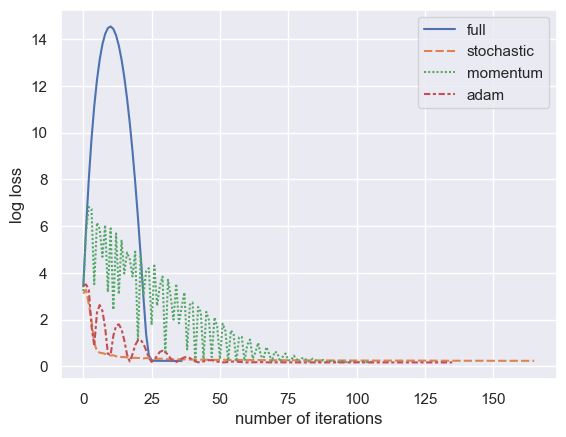

In [42]:
ax = sns.lineplot(losses_for_graph)
ax.set_xlabel('number of iterations')
ax.set_ylabel('log loss')

Больше всего шагов нужно SGD, чтобы сойтись, но подсчеты такокого градиента скорее всего работают быстрее, чем у просто GD, поскольку градиент считается по батчам. Меньше всего шагов для сходимости нужно full GD и по графику видно, что ошибка сначала резко разстет, а потом резко падает. Ошибки для Адама и моментума убывают не монотонно и для моментума достаточно медленно

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [43]:
import time
batch_sizes = np.arange(5, 500, 10)
dimention = X_train.shape[1]

method = 'stochastic'

mean_iter = []
mean_time = []
for size in batch_sizes:

    res_time = []
    num_iters = []
    for k in range(10):
        start_time = time.time()
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': dimention,
                'lambda_': best_lambda_loss[method][0],
                'batch_size' : size
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        num_iters.append(len(regression.loss_history))
        end_time = time.time()
        res_time.append(end_time - start_time)
    mean_iter.append(np.mean(num_iters))
    mean_time.append(np.mean(res_time))
    print(f'batch size: {size}, mean iteration: {mean_iter[-1]}, mean time: { mean_time[-1]}')

batch size: 5, mean iteration: 265.7, mean time: 0.313119912147522
batch size: 15, mean iteration: 255.0, mean time: 0.2906111478805542
batch size: 25, mean iteration: 237.2, mean time: 0.279020357131958
batch size: 35, mean iteration: 185.8, mean time: 0.21272525787353516
batch size: 45, mean iteration: 176.2, mean time: 0.20869808197021483
batch size: 55, mean iteration: 149.8, mean time: 0.17044672966003419
batch size: 65, mean iteration: 139.5, mean time: 0.1695249557495117
batch size: 75, mean iteration: 121.0, mean time: 0.1379242181777954
batch size: 85, mean iteration: 125.8, mean time: 0.14375631809234618
batch size: 95, mean iteration: 115.6, mean time: 0.13591670989990234
batch size: 105, mean iteration: 103.7, mean time: 0.11745240688323974
batch size: 115, mean iteration: 101.3, mean time: 0.12053391933441163
batch size: 125, mean iteration: 105.8, mean time: 0.1221459150314331
batch size: 135, mean iteration: 86.7, mean time: 0.10090434551239014
batch size: 145, mean iter

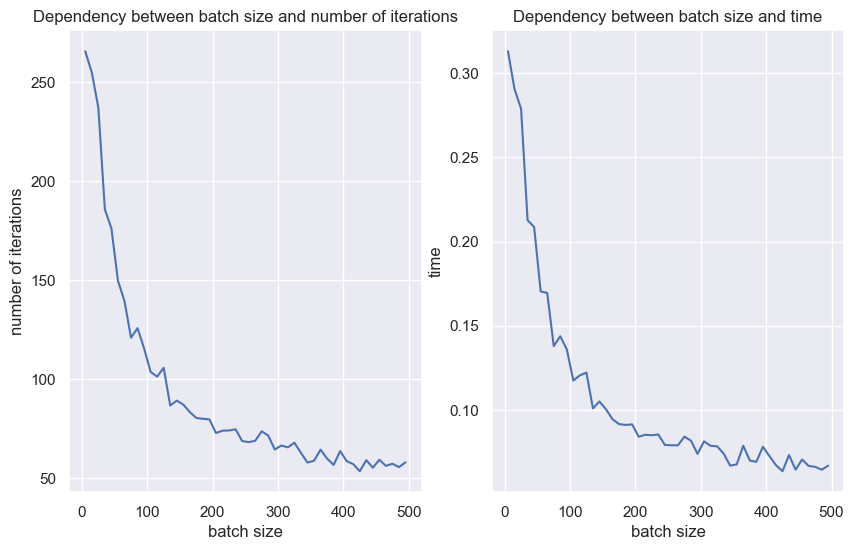

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1 = sns.lineplot(x=batch_sizes, y=mean_iter, ax = ax1)
ax1.set_xlabel('batch size')
ax1.set_ylabel('number of iterations')
ax1.set_title("Dependency between batch size and number of iterations")

ax2 = sns.lineplot(x=batch_sizes, y=mean_time, ax= ax2)
ax2.set_xlabel('batch size')
ax2.set_ylabel('time')
ax2.set_title("Dependency between batch size and time")
fig.set_size_inches(10, 6);


Чем больше batch size, тем меньше времени необходимо, чтобы все сошлось. Чем больше batch size тем меньше итераций нам нужно сделать для сходимости

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/95371902/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [45]:
lambdas = np.logspace(-2, 1, 10)
mus = np.logspace(-1, 1, 10)

dimention = X_train.shape[1]
best_lr = []
best_loss = []
methods = ['full', 'stochastic', 'momentum', 'adam']
res = dd(list)
for method in methods:
    for lr in lambdas:
        best_loss = 1e9
        best_mu = 0
        for mu in mus:
            descent_config = {
                'descent_name': method,
                'kwargs': {
                    'dimension': dimention,
                    'lambda_': lr
                },
                'regularized' : True,
                'mu' : mu
            }

            regression = LinearRegression(
                descent_config=descent_config
            )

            regression.fit(X_train, y_train)
            y_train_pred = regression.predict(X_train)
            y_test_pred = regression.predict(X_test)
            loss = regression.calc_loss(X_val, y_val)
            if (loss <= best_loss):
                best_loss = loss
                best_mu = mu
        print(f'{method}: lambda: {lr}, best mu:{ best_mu}')
        res[method].append((lr ,best_mu))


full: lambda: 0.01, best mu:10.0
full: lambda: 0.021544346900318832, best mu:2.1544346900318834
full: lambda: 0.046415888336127774, best mu:0.1
full: lambda: 0.1, best mu:0.46415888336127786
full: lambda: 0.21544346900318834, best mu:1.291549665014884
full: lambda: 0.46415888336127775, best mu:10.0
full: lambda: 1.0, best mu:2.1544346900318834
full: lambda: 2.154434690031882, best mu:5.994842503189409
full: lambda: 4.6415888336127775, best mu:0
full: lambda: 10.0, best mu:0
stochastic: lambda: 0.01, best mu:0.2782559402207124
stochastic: lambda: 0.021544346900318832, best mu:5.994842503189409
stochastic: lambda: 0.046415888336127774, best mu:3.593813663804626
stochastic: lambda: 0.1, best mu:10.0
stochastic: lambda: 0.21544346900318834, best mu:0.774263682681127
stochastic: lambda: 0.46415888336127775, best mu:3.593813663804626
stochastic: lambda: 1.0, best mu:5.994842503189409
stochastic: lambda: 2.154434690031882, best mu:0
stochastic: lambda: 4.6415888336127775, best mu:0
stochastic

In [47]:
best_lr_mu = dd(list)
dimention = X_train.shape[1]
methods = ['full', 'stochastic', 'momentum', 'adam']
for method in methods:
    best_loss = 1e9
    best_mu = 1e9
    best_lr = 1e9
    for lr, mu in res[method]:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': dimention,
                'lambda_': lr
            },
            'regularized' : True,
            'mu' : mu
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)
        loss = regression.calc_loss(X_val, y_val)
        if (loss <= best_loss):
            best_loss = loss
            best_mu = mu
            best_lr = lr

    print(f'{method}: best lambda: {best_lr}, best mu: {best_mu}')
    best_lr_mu[method].append(best_lr)
    best_lr_mu[method].append(best_mu)
    best_lr_mu[method].append(best_loss)


full: best lambda: 1.0, best mu: 2.1544346900318834
stochastic: best lambda: 0.46415888336127775, best mu: 3.593813663804626
momentum: best lambda: 1.0, best mu: 0.16681005372000587
adam: best lambda: 10.0, best mu: 5.994842503189409


In [48]:
best_lr_mu

defaultdict(list,
            {'full': [1.0, 2.1544346900318834, 0.27106191376667704],
             'stochastic': [0.46415888336127775,
              3.593813663804626,
              0.2824041874418457],
             'momentum': [1.0, 0.16681005372000587, 0.22100309068573915],
             'adam': [10.0, 5.994842503189409, 0.18426697845170026]})

In [49]:
metrics_with_reg = dd(dict)
for method in methods:


    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': best_lr_mu[method][0]
        },
        'regularized' : True,
        'mu' : best_lr_mu[method][1]
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)

    metrics_with_reg[method]['train loss'] = regression.calc_loss(X_train, y_train)
    metrics_with_reg[method]['test loss'] = regression.calc_loss(X_test, y_test)
    metrics_with_reg[method]['train R2 loss'] = r2_score(y_train, y_train_pred)
    metrics_with_reg[method]['test R2 loss'] = r2_score(y_test, y_test_pred)
    metrics_with_reg[method]['iterations till convergence'] = len(regression.loss_history)



In [50]:
df_metrics_reg = pd.DataFrame(metrics_with_reg)
df_metrics_reg

full  stochastic    momentum        adam
train loss                    0.268825    0.288871    0.218700    0.184270
test loss                     0.276985    0.296177    0.221611    0.186918
train R2 loss                 0.768622    0.751368    0.811764    0.841399
test R2 loss                  0.764498    0.748180    0.811579    0.841076
iterations till convergence  49.000000  177.000000  107.000000  136.000000

In [51]:
df_metrics

full  stochastic    momentum        adam
train error                   0.272895    0.265141    0.221542    0.183505
test error                    0.275229    0.269683    0.224214    0.186174
train R2 loss                 0.765119    0.771792    0.809318    0.842057
test R2 loss                  0.765991    0.770707    0.809366    0.841709
iterations till convergence  42.000000  135.000000  107.000000  150.000000

с регуляризацией требуется больше шагов во всех случаях, кроме адама до сходимости, что логично, потому что мы накладываем дополнительное условие

In [52]:
losses_for_graph_with_reg = dd(list)
for method in methods:
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': best_lr_mu[method][0]
        },
        'regularized' : True,
        'mu' : best_lr_mu[method][1]
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    losses_for_graph_with_reg[method] = np.log1p(regression.loss_history)


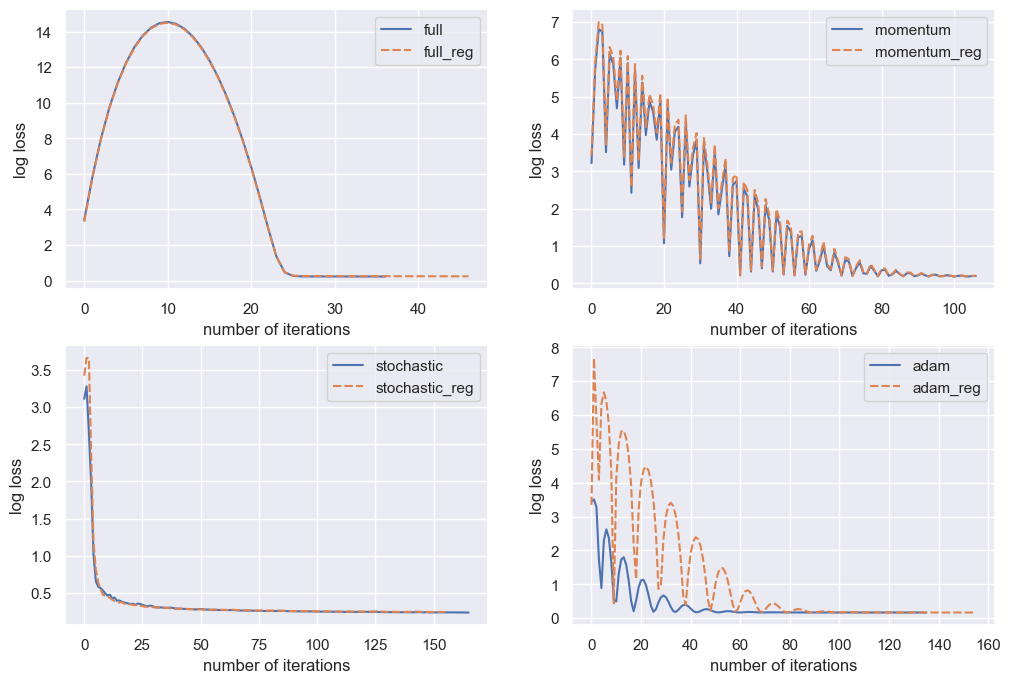

In [53]:
fig, ax = plt.subplots(2, 2)
ax[0][0] = sns.lineplot({
    "full": losses_for_graph["full"],
    "full_reg": losses_for_graph_with_reg["full"],
}, ax = ax[0][0])

ax[0][0].set_xlabel('number of iterations')
ax[0][0].set_ylabel('log loss')

ax[1][0] = sns.lineplot({
    "stochastic": losses_for_graph["stochastic"],
    "stochastic_reg": losses_for_graph_with_reg["stochastic"],
}, ax = ax[1][0])

ax[1][0].set_xlabel('number of iterations')
ax[1][0].set_ylabel('log loss')

ax[0][1] = sns.lineplot({
    "momentum": losses_for_graph["momentum"],
    "momentum_reg": losses_for_graph_with_reg["momentum"],
}, ax = ax[0][1])

ax[0][1].set_xlabel('number of iterations')
ax[0][1].set_ylabel('log loss')

ax[1][1] = sns.lineplot({
    "adam": losses_for_graph["adam"],
    "adam_reg": losses_for_graph_with_reg["adam"],
}, ax = ax[1][1])
ax[1][1].set_xlabel('number of iterations')
ax[1][1].set_ylabel('log loss')

fig.set_size_inches(12, 8)

Ошибка на тесте немного уменьшились или осталась такой же, $R_2$ скор тоже выроc на тесте, но не очень значительно

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$ \nabla_w Q(w)
    =
    \frac{1}{l} \sum \limits_{i = 1}^l tanh(a(x_i, w) - y_i)x_i = \frac{1}{l} X^T tanh(Xw - y) $$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [54]:
from descents import LossFunction

lambdas = np.logspace(-2, 1, 10)

dimention = X_train.shape[1]
methods = ['full', 'stochastic', 'momentum', 'adam']
res_log_cosh = dd(list)
for method in methods:
    losses = []
    best_lr = 1e9
    best_loss = 1e9
    for lr in lambdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': dimention,
                'lambda_': lr,
                'loss_function' : LossFunction.LogCosh
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)
        loss = regression.calc_loss(X_val, y_val)
        if (loss <= best_loss):
            best_loss = loss
            best_lr = lr
        print(f'{method}: lr: {lr}, LogCosh loss : {loss}')
    res_log_cosh[method].append(best_lr)
    res_log_cosh[method].append(best_loss)

full: lr: 0.01, LogCosh loss : 3.6286663106000057
full: lr: 0.021544346900318832, LogCosh loss : 4.243522937935595
full: lr: 0.046415888336127774, LogCosh loss : 2.062968258448368
full: lr: 0.1, LogCosh loss : 0.6368360083413196
full: lr: 0.21544346900318834, LogCosh loss : 0.2835160598192977
full: lr: 0.46415888336127775, LogCosh loss : 0.19841832772394521
full: lr: 1.0, LogCosh loss : 0.1381295536562847
full: lr: 2.154434690031882, LogCosh loss : 0.12194742877670701
full: lr: 4.6415888336127775, LogCosh loss : 0.10596386447560631
full: lr: 10.0, LogCosh loss : 0.09372410536575757
stochastic: lr: 0.01, LogCosh loss : 3.4750536556149343
stochastic: lr: 0.021544346900318832, LogCosh loss : 3.796418245888394
stochastic: lr: 0.046415888336127774, LogCosh loss : 1.8374437977308562
stochastic: lr: 0.1, LogCosh loss : 1.0294029068965243
stochastic: lr: 0.21544346900318834, LogCosh loss : 0.3410047134286901
stochastic: lr: 0.46415888336127775, LogCosh loss : 0.18664874995956326
stochastic: lr

In [55]:
res_log_cosh

defaultdict(list,
            {'full': [10.0, 0.09372410536575757],
             'stochastic': [4.6415888336127775, 0.09865419286762132],
             'momentum': [4.6415888336127775, 0.08325838251278794],
             'adam': [4.6415888336127775, 0.07859981117975867]})

In [56]:
log_cosh_metrics = dd(dict)
for method in methods:
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': res_log_cosh[method][0],
            'loss_function' : LossFunction.LogCosh
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)


    log_cosh_metrics[method]['train error'] = regression.calc_loss(X_train, y_train)
    log_cosh_metrics[method]['test error'] = regression.calc_loss(X_test, y_test)
    log_cosh_metrics[method]['train R2 loss'] = r2_score(y_train, y_train_pred)
    log_cosh_metrics[method]['test R2 loss'] = r2_score(y_test, y_test_pred)
    log_cosh_metrics[method]['iterations till convergence'] = len(regression.loss_history)



In [57]:
df_log_cosh = pd.DataFrame(log_cosh_metrics)
df_log_cosh

full  stochastic    momentum        adam
train error                    0.093070    0.097013    0.083916    0.078940
test error                     0.095093    0.098590    0.084953    0.080130
train R2 loss                  0.812180    0.801511    0.830980    0.842024
test R2 loss                   0.810303    0.800786    0.831093    0.841682
iterations till convergence  253.000000  301.000000  187.000000  158.000000

In [58]:
df_metrics

full  stochastic    momentum        adam
train error                   0.272895    0.265141    0.221542    0.183505
test error                    0.275229    0.269683    0.224214    0.186174
train R2 loss                 0.765119    0.771792    0.809318    0.842057
test R2 loss                  0.765991    0.770707    0.809366    0.841709
iterations till convergence  42.000000  135.000000  107.000000  150.000000

In [59]:
log_cosh_graph = dd(list)
for method in methods:
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': res_log_cosh[method][0],
            'loss_function' : LossFunction.LogCosh
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    log_cosh_graph[method] = np.log1p(regression.loss_history)


Text(0, 0.5, 'log cosh ')

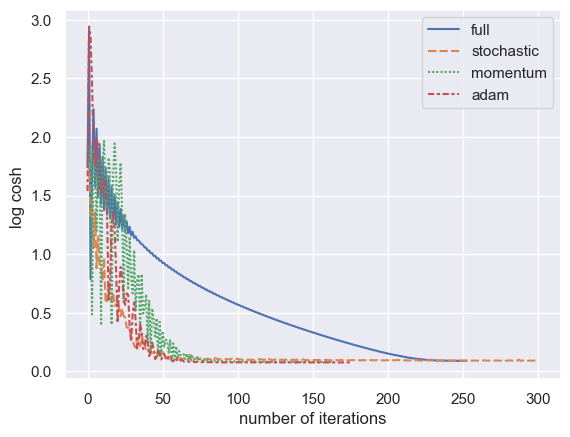

In [60]:
ax = sns.lineplot(log_cosh_graph)
ax.set_xlabel('number of iterations')
ax.set_ylabel('log cosh ')

Количество итераций до сходимости увеличилось у всех методов, а Адам вообще не сошлеся.$R_2$ увеличился для всех методов, кроме Adam, где он остался почти таким же

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

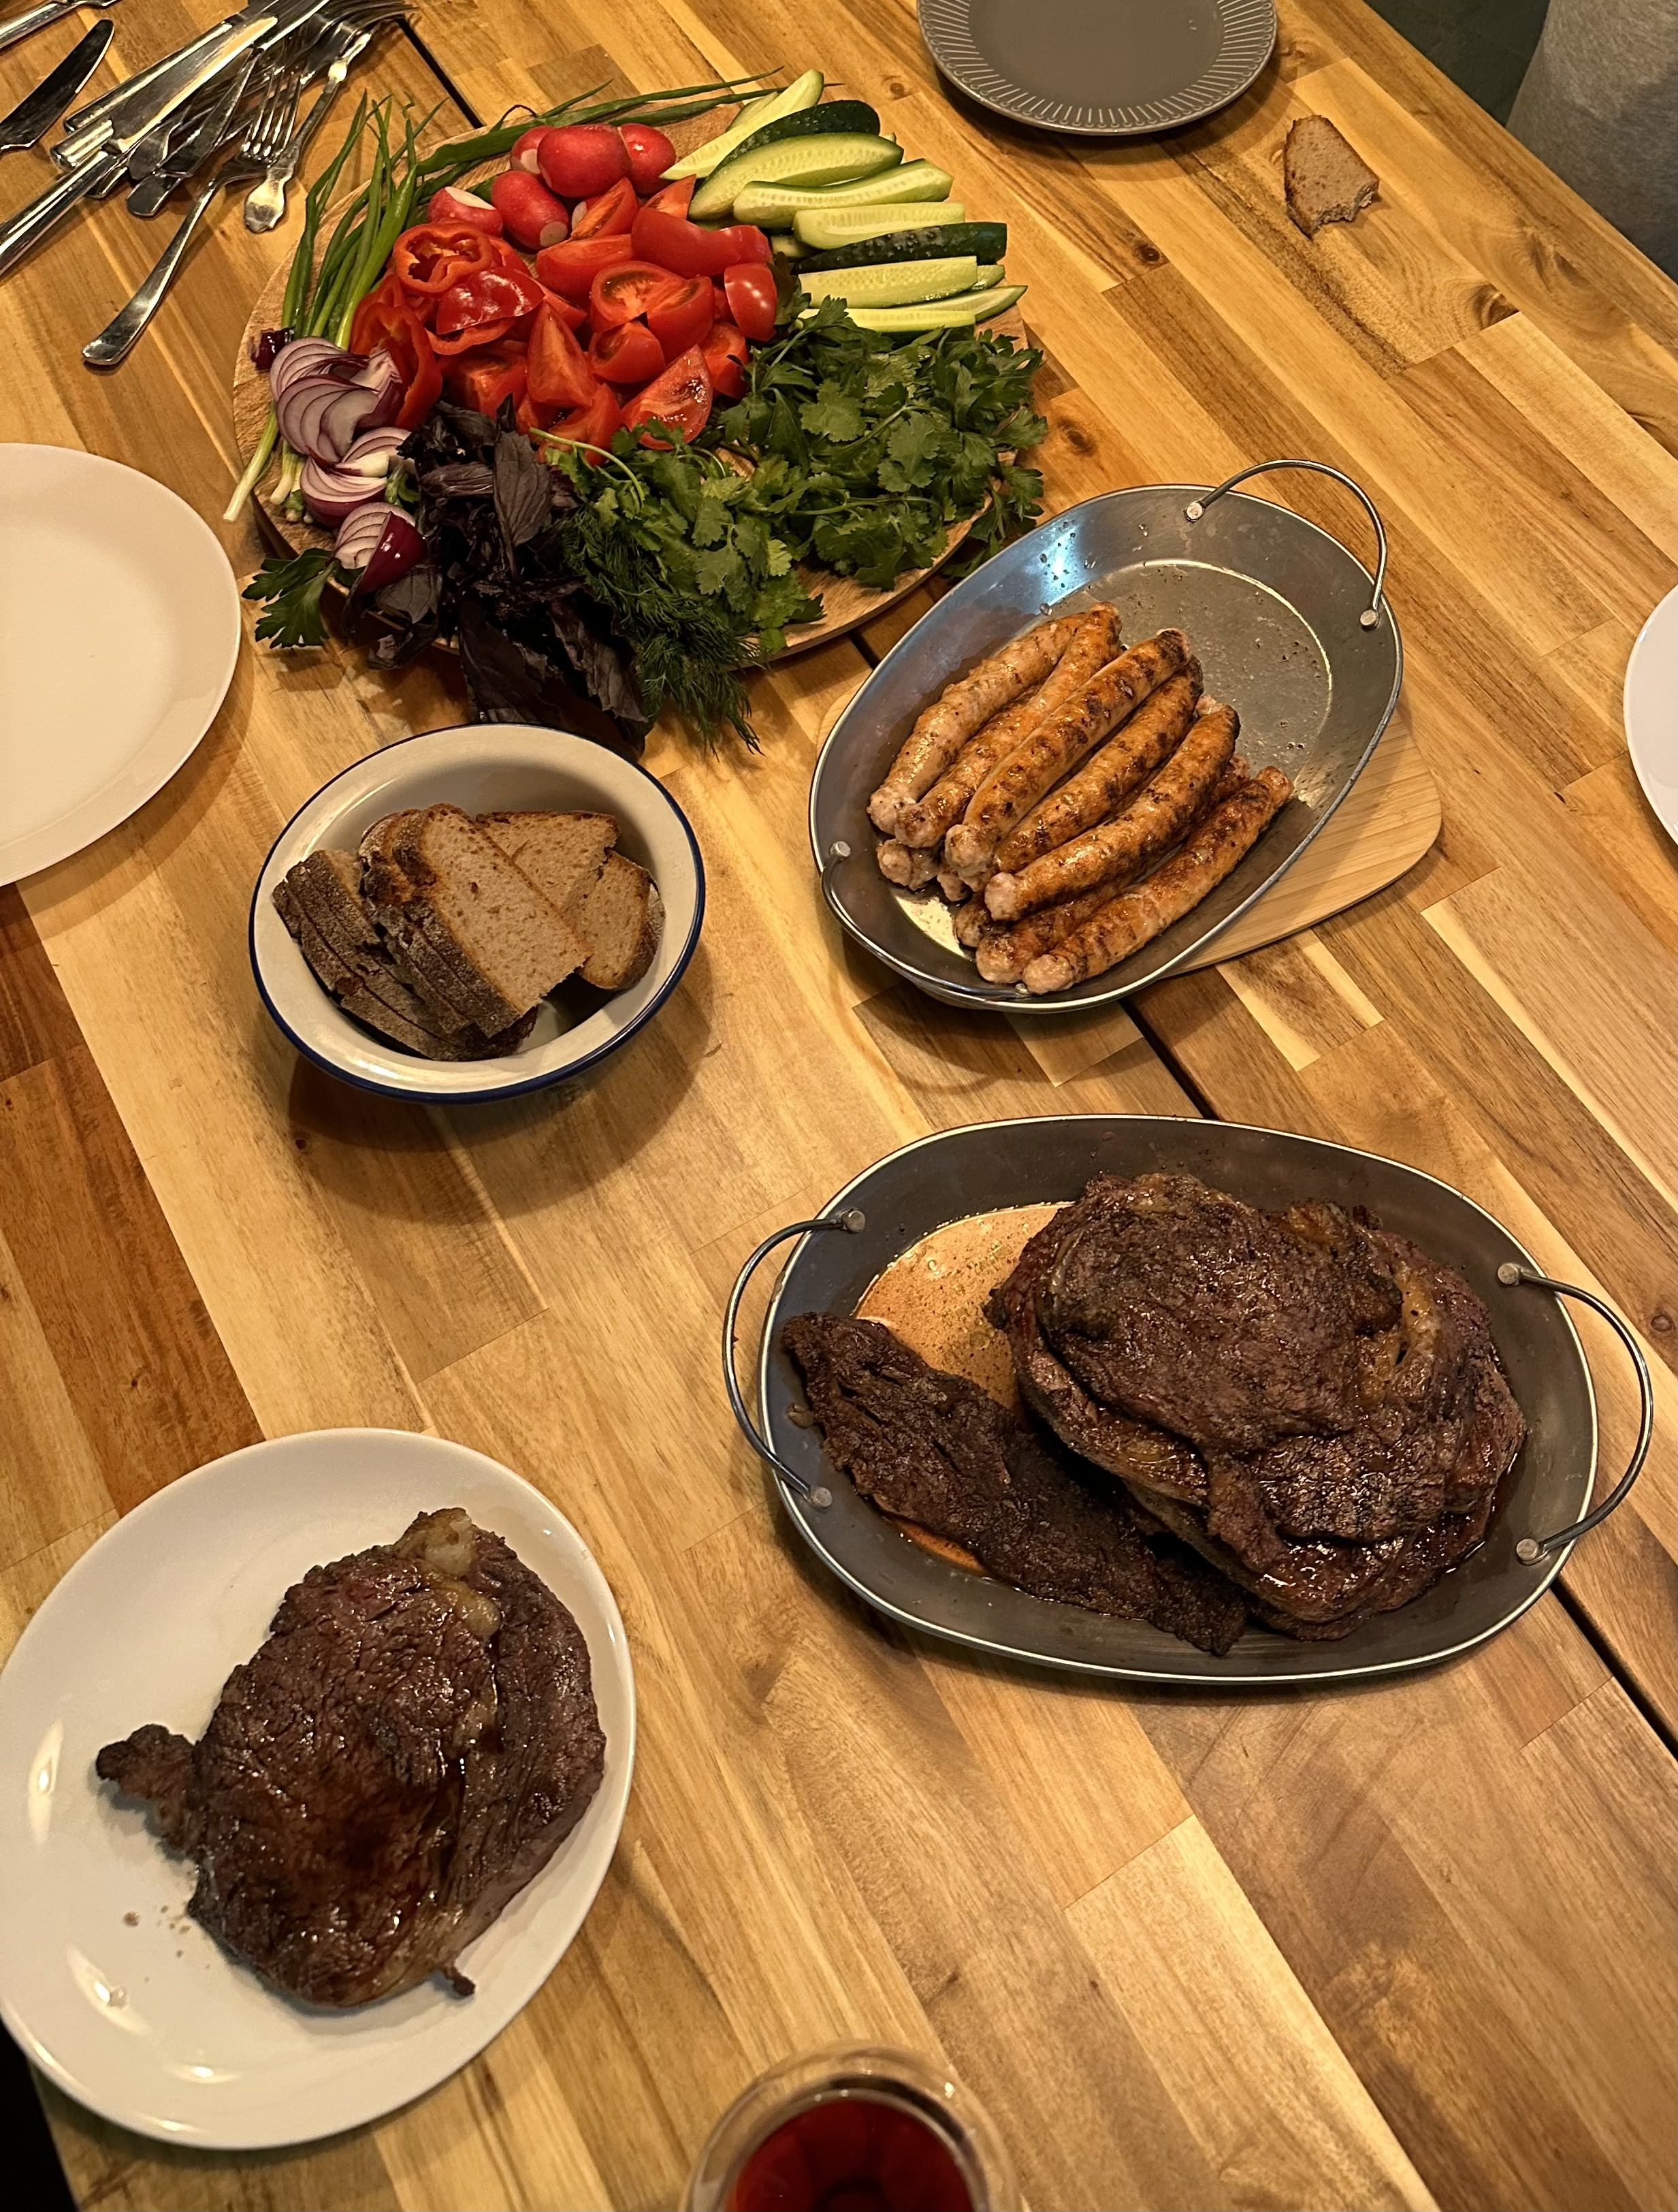

In [63]:
from IPython.display import Image
Image('food.jpg')

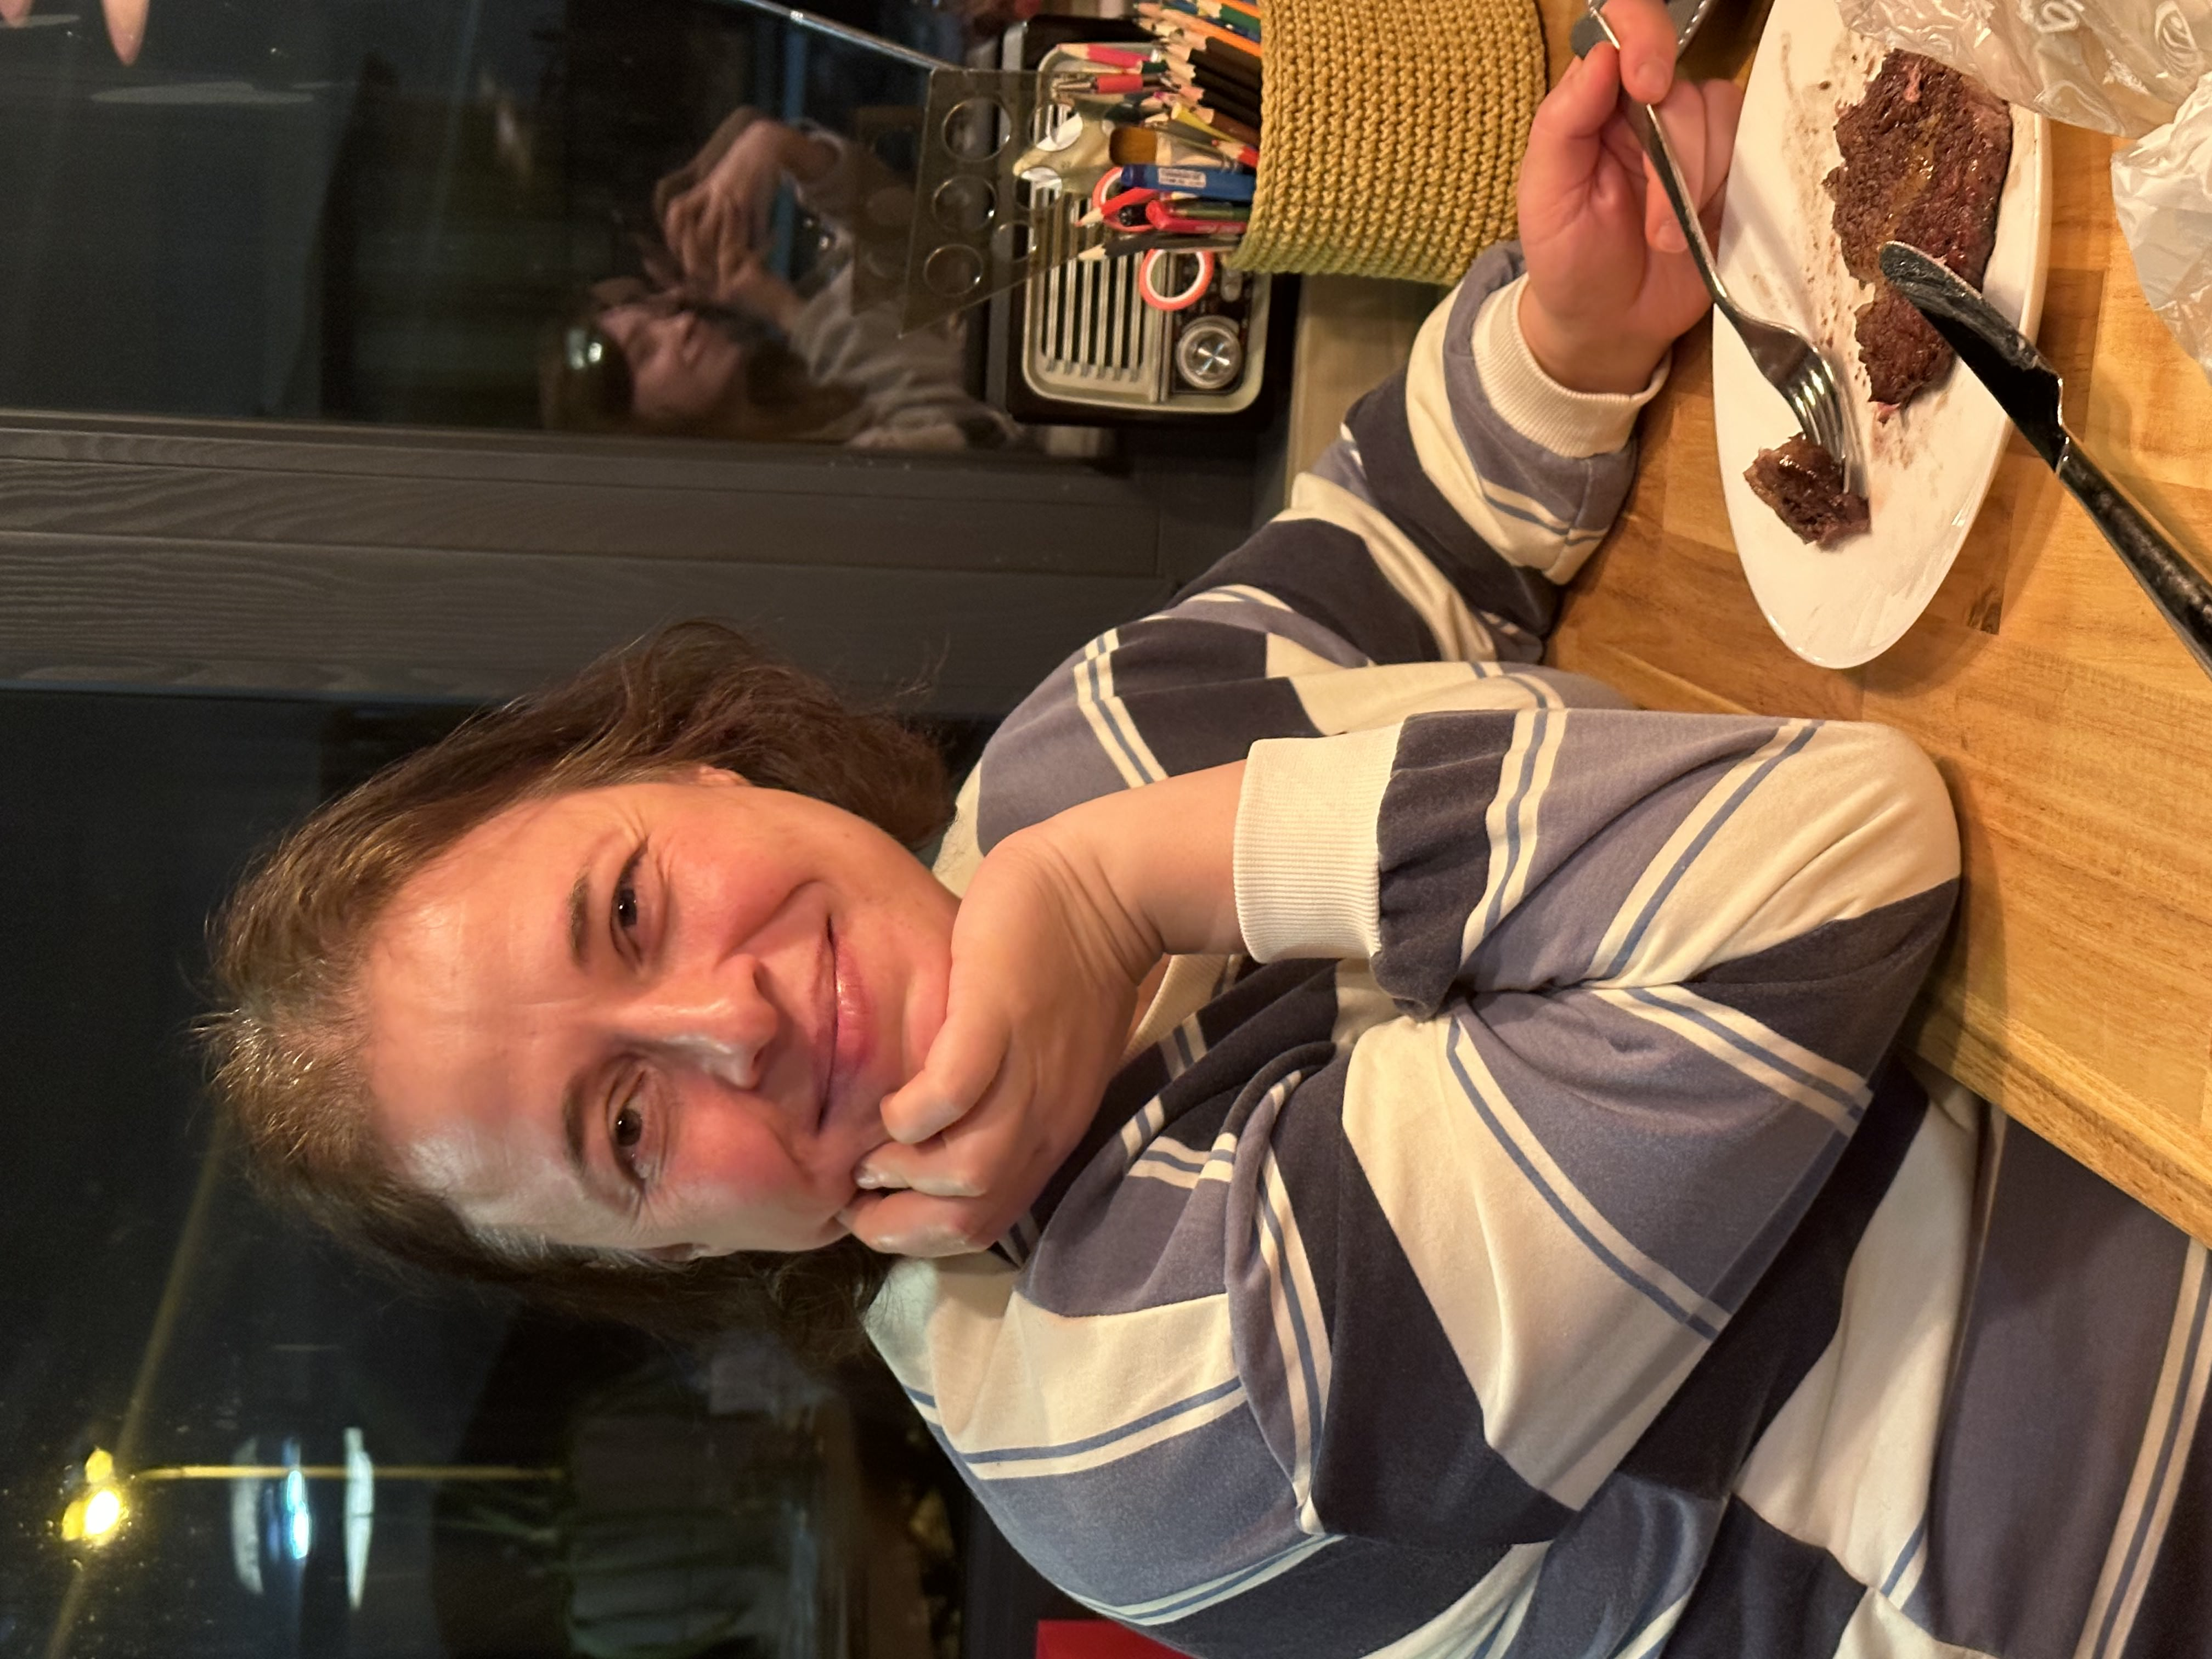

In [64]:
Image('guest.jpg')

Это был семейный ужин, для которого я готовила пюре. Было супер мило так собраться с семьей, а на фото моя тетя

Рецепт пюре:

Сварить картошку, размять сваренную картошку с растопленным маслом. После этого добавить молоко и все посолить

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [65]:
from descents import LossFunction
lambdas = np.logspace(-5, 1, 10)

dimention = X_train.shape[1]
method = 'adamax'


losses = []
best_lr_adamax = 1e9
best_loss_adamax = 1e9
for lr in lambdas:
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': lr,
            'loss_function' : LossFunction.LogCosh

        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)
    loss = regression.calc_loss(X_val, y_val)
    if (loss <= best_loss_adamax):
        best_loss_adamax = loss
        best_lr_adamax = lr
    print(f'{method}: lr: {lr}, LogCosh loss: {loss}')

adamax: lr: 1e-05, LogCosh loss: 4.121549107072757
adamax: lr: 4.641588833612782e-05, LogCosh loss: 3.7694174530235673
adamax: lr: 0.00021544346900318823, LogCosh loss: 4.537173164208531
adamax: lr: 0.001, LogCosh loss: 4.596373064550865
adamax: lr: 0.004641588833612777, LogCosh loss: 3.7931675841672265
adamax: lr: 0.021544346900318822, LogCosh loss: 0.2552644329870425
adamax: lr: 0.1, LogCosh loss: 0.08601781781627013
adamax: lr: 0.46415888336127725, LogCosh loss: 0.07997150318552303
adamax: lr: 2.154434690031882, LogCosh loss: 0.07883830186867294
adamax: lr: 10.0, LogCosh loss: 0.07862736156843618


In [66]:
print('best lr for adamax:', best_lr_adamax, 'best loss for adamax:', best_loss_adamax)

best lr for adamax: 10.0 best loss for adamax: 0.07862736156843618


In [67]:
adamax_metrics = dd(dict)
method = 'adamax'

descent_config = {
    'descent_name': method,
    'kwargs': {
        'dimension': dimention,
        'lambda_': best_lr_adamax,
        'loss_function' : LossFunction.LogCosh
    }
}

regression = LinearRegression(
    descent_config=descent_config
)

regression.fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_test_pred = regression.predict(X_test)


adamax_metrics[method]['train error'] = regression.calc_loss(X_train, y_train)
adamax_metrics[method]['test error'] = regression.calc_loss(X_test, y_test)
adamax_metrics[method]['train R2 loss'] = r2_score(y_train, y_train_pred)
adamax_metrics[method]['test R2 loss'] = r2_score(y_test, y_test_pred)
adamax_metrics[method]['loss history'] = np.log1p(regression.loss_history)
adamax_metrics[method]['iterations till convergence'] = len(regression.loss_history)




In [68]:
df_adamax = pd.DataFrame(adamax_metrics)
df_adamax

adamax
iterations till convergence                                                157
loss history                 [1.6653330797722208, 3.802919199970052, 3.7540...
test R2 loss                                                          0.841489
test error                                                            0.080219
train R2 loss                                                          0.84189
train error                                                           0.078988

In [69]:
df_metrics

full  stochastic    momentum        adam
train error                   0.272895    0.265141    0.221542    0.183505
test error                    0.275229    0.269683    0.224214    0.186174
train R2 loss                 0.765119    0.771792    0.809318    0.842057
test R2 loss                  0.765991    0.770707    0.809366    0.841709
iterations till convergence  42.000000  135.000000  107.000000  150.000000

In [70]:
df_log_cosh

full  stochastic    momentum        adam
train error                    0.093070    0.097013    0.083916    0.078940
test error                     0.095093    0.098590    0.084953    0.080130
train R2 loss                  0.812180    0.801511    0.830980    0.842024
test R2 loss                   0.810303    0.800786    0.831093    0.841682
iterations till convergence  253.000000  301.000000  187.000000  158.000000

Text(0, 0.5, 'log cosh ')

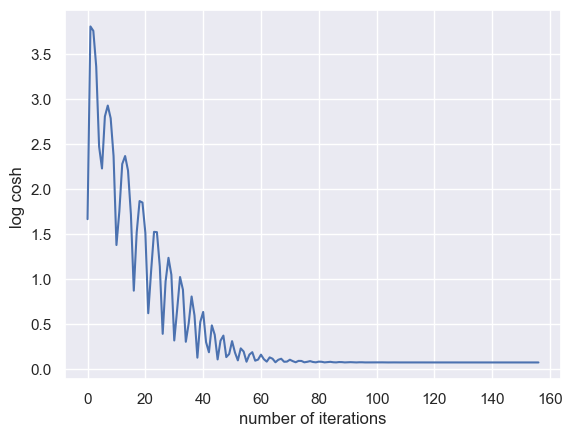

In [71]:
ax = sns.lineplot(adamax_metrics['adamax']['loss history'])
ax.set_xlabel('number of iterations')
ax.set_ylabel('log cosh ')

Adamax показал очень хорошие результаты в $R_2$ score. Правда для adamax нужно сильно больше итераций, чем для моментума. Ошибка у Adamax падает не монотонно

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:


MAE:

$L(w) = \frac{1}{l} \sum \limits_{i = 1}^l |a(x_i, w) - y_i|$

$\frac{\partial{L(w)}}{\partial{w}} = \frac{1}{l} \sum \limits_{i = 1}^{l} sign(a(x_i, w) - y_i) * x$

Huber:

$L_{\delta}(w)=  \frac{1}{l} \sum \limits_{i = 1}^l \left( \frac{1}{2}(y_i - a(x_i, w))^2 [|y_i - a(x_i, w)| \le \delta] + \delta (|y_i - a(x_i, w)| - \frac{1}{2} \delta) * [|y_i - a(x_i, w)| > \delta]   \right)$

$\frac{\partial{L_{\delta}(w)}}{\partial{w}} = \frac{1}{l} \sum \limits_{i = 1}^l  \left((y_i - a(x_i, w)) * x_i *[|y_i - a(x_i, w)| \le \delta] + \delta * sign(y_i - a(x_i, w)) * x_i  * [|y_i - a(x_i, w)| > \delta] \right)$

Дальше в коде $\delta$ будет по дефоту равна 0.001

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [72]:
from descents import LossFunction

lambdas = np.logspace(-5, 2, 20)

dimention = X_train.shape[1]
methods = ['full', 'stochastic', 'momentum', 'adam']
mae_lr_loss = dd(list)
for method in methods:
    losses = []
    best_lr = 1e9
    best_loss = 1e9
    for lr in lambdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': dimention,
                'lambda_': lr,
                'loss_function' : LossFunction.MAE
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)
        loss = regression.calc_loss(X_val, y_val)
        if (loss <= best_loss):
            best_loss = loss
            best_lr = lr
        print(f'{method}: lr: {lr}, MAE loss: {loss}')
    mae_lr_loss[method].append(best_lr)
    mae_lr_loss[method].append(best_loss)

full: lr: 1e-05, MAE loss: 4.676160360545795
full: lr: 2.3357214690901213e-05, MAE loss: 5.489244322573818
full: lr: 5.4555947811685143e-05, MAE loss: 4.916547233057647
full: lr: 0.00012742749857031334, MAE loss: 4.568047198190324
full: lr: 0.00029763514416313193, MAE loss: 5.651021680029184
full: lr: 0.0006951927961775605, MAE loss: 4.199737504801736
full: lr: 0.001623776739188721, MAE loss: 4.126091444184551
full: lr: 0.00379269019073225, MAE loss: 4.425387289284402
full: lr: 0.008858667904100823, MAE loss: 4.629906831033087
full: lr: 0.02069138081114788, MAE loss: 4.386391120536296
full: lr: 0.04832930238571752, MAE loss: 2.159243040159415
full: lr: 0.11288378916846883, MAE loss: 1.175732655463781
full: lr: 0.26366508987303555, MAE loss: 0.5907204697047036
full: lr: 0.6158482110660255, MAE loss: 0.43122028565777343
full: lr: 1.438449888287663, MAE loss: 0.36625536657593305
full: lr: 3.359818286283781, MAE loss: 0.3329746338304536
full: lr: 7.847599703514607, MAE loss: 0.735644598240

In [73]:
mae_metrics = dd(dict)
for method in methods:
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': mae_lr_loss[method][0],
            'loss_function' : LossFunction.MAE
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)


    mae_metrics[method]['train error'] = regression.calc_loss(X_train, y_train)
    mae_metrics[method]['test error'] = regression.calc_loss(X_test, y_test)
    mae_metrics[method]['train R2 loss'] = r2_score(y_train, y_train_pred)
    mae_metrics[method]['test R2 loss'] = r2_score(y_test, y_test_pred)
    mae_metrics[method]['iterations till convergence'] = len(regression.loss_history)




In [74]:
df_mae = pd.DataFrame(mae_metrics)
df_mae

full  stochastic    momentum        adam
train error                    0.335909    0.337924    0.304464    0.298506
test error                     0.339315    0.341771    0.307160    0.301349
train R2 loss                  0.802815    0.809588    0.830118    0.836893
test R2 loss                   0.800924    0.808300    0.829889    0.836100
iterations till convergence  218.000000  301.000000  196.000000  301.000000

In [75]:
mae_graph = dd(list)
for method in methods:
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': mae_lr_loss[method][0],
            'loss_function' : LossFunction.MAE
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    mae_graph[method] = np.log1p(regression.loss_history)


Text(0, 0.5, 'mae ')

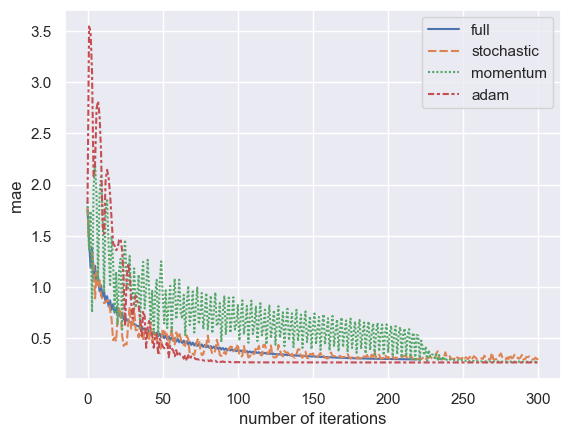

In [76]:
ax = sns.lineplot(mae_graph)
ax.set_xlabel('number of iterations')
ax.set_ylabel('mae ')

In [77]:
from descents import LossFunction

lambdas = np.logspace(-5, 2, 10)

dimention = X_train.shape[1]
methods = ['full', 'stochastic', 'momentum', 'adam']
huber_lr_loss = dd(list)
for method in methods:
    losses = []
    best_lr = 1e9
    best_loss = 1e9
    for lr in lambdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': dimention,
                'lambda_': lr,
                'loss_function' : LossFunction.Huber
            }
        }

        regression = LinearRegression(
            descent_config=descent_config
        )

        regression.fit(X_train, y_train)
        y_train_pred = regression.predict(X_train)
        y_test_pred = regression.predict(X_test)
        loss = regression.calc_loss(X_val, y_val)
        if (loss <= best_loss):
            best_loss = loss
            best_lr = lr
        print(f'{method}: lr: {lr}, Huber loss: {loss}')
    huber_lr_loss[method].append(best_lr)
    huber_lr_loss[method].append(best_loss)

full: lr: 1e-05, Huber loss: 3.536076908550658
full: lr: 5.994842503189409e-05, Huber loss: 4.436471111265185
full: lr: 0.00035938136638046257, Huber loss: 3.3266145667581557
full: lr: 0.0021544346900318843, Huber loss: 4.885554726380062
full: lr: 0.01291549665014884, Huber loss: 4.015799448260514
full: lr: 0.0774263682681127, Huber loss: 0.9792488633294856
full: lr: 0.4641588833612782, Huber loss: 0.19931676287420097
full: lr: 2.782559402207126, Huber loss: 0.12515354508824858
full: lr: 16.68100537200059, Huber loss: 0.9945264497331298
full: lr: 100.0, Huber loss: 1.6576196217286867
stochastic: lr: 1e-05, Huber loss: 4.511997263477115
stochastic: lr: 5.994842503189409e-05, Huber loss: 5.464757949027546
stochastic: lr: 0.00035938136638046257, Huber loss: 3.232023285394951
stochastic: lr: 0.0021544346900318843, Huber loss: 3.832895691488668
stochastic: lr: 0.01291549665014884, Huber loss: 4.16498962806629
stochastic: lr: 0.0774263682681127, Huber loss: 1.395955876966015
stochastic: lr: 

In [78]:
huber_lr_loss

defaultdict(list,
            {'full': [2.782559402207126, 0.12515354508824858],
             'stochastic': [2.782559402207126, 0.10568477275212138],
             'momentum': [2.782559402207126, 0.09352700322998095],
             'adam': [16.68100537200059, 0.0856980106436157]})

In [79]:
huber_metrics = dd(dict)
for method in methods:
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': huber_lr_loss[method][0],
            'loss_function' : LossFunction.Huber
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)


    huber_metrics[method]['train error'] = regression.calc_loss(X_train, y_train)
    huber_metrics[method]['test error'] = regression.calc_loss(X_test, y_test)
    huber_metrics[method]['train R2 loss'] = r2_score(y_train, y_train_pred)
    huber_metrics[method]['test R2 loss'] = r2_score(y_test, y_test_pred)
    huber_metrics[method]['iterations till convergence'] = len(regression.loss_history)

In [80]:
df_huber = pd.DataFrame(huber_metrics)
df_huber

full  stochastic    momentum        adam
train error                   0.124551    0.103868    0.092665    0.086040
test error                    0.125988    0.104573    0.093641    0.087402
train R2 loss                 0.770361    0.807220    0.828630    0.842156
test R2 loss                  0.770045    0.808425    0.829396    0.841784
iterations till convergence  68.000000  301.000000  140.000000  174.000000

In [81]:
huber_graph = dd(list)
for method in methods:
    descent_config = {
        'descent_name': method,
        'kwargs': {
            'dimension': dimention,
            'lambda_': huber_lr_loss[method][0],
            'loss_function' : LossFunction.Huber
        }
    }

    regression = LinearRegression(
        descent_config=descent_config
    )

    regression.fit(X_train, y_train)
    huber_graph[method] = np.log1p(regression.loss_history)


Text(0, 0.5, 'huber loss ')

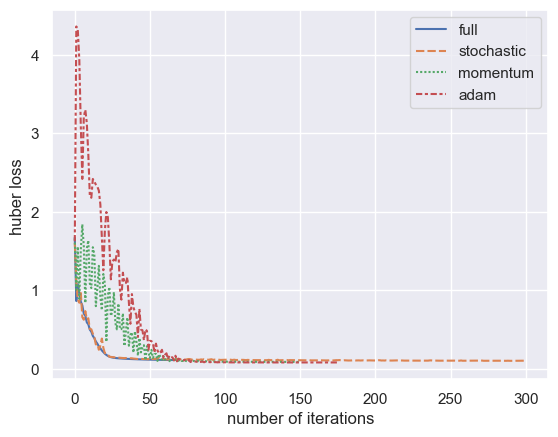

In [82]:
ax = sns.lineplot(huber_graph)
ax.set_xlabel('number of iterations')
ax.set_ylabel('huber loss ')

In [83]:
df_huber

full  stochastic    momentum        adam
train error                   0.124551    0.103868    0.092665    0.086040
test error                    0.125988    0.104573    0.093641    0.087402
train R2 loss                 0.770361    0.807220    0.828630    0.842156
test R2 loss                  0.770045    0.808425    0.829396    0.841784
iterations till convergence  68.000000  301.000000  140.000000  174.000000

In [84]:
df_mae

full  stochastic    momentum        adam
train error                    0.335909    0.337924    0.304464    0.298506
test error                     0.339315    0.341771    0.307160    0.301349
train R2 loss                  0.802815    0.809588    0.830118    0.836893
test R2 loss                   0.800924    0.808300    0.829889    0.836100
iterations till convergence  218.000000  301.000000  196.000000  301.000000

In [85]:
df_metrics

full  stochastic    momentum        adam
train error                   0.272895    0.265141    0.221542    0.183505
test error                    0.275229    0.269683    0.224214    0.186174
train R2 loss                 0.765119    0.771792    0.809318    0.842057
test R2 loss                  0.765991    0.770707    0.809366    0.841709
iterations till convergence  42.000000  135.000000  107.000000  150.000000

In [86]:
df_log_cosh

full  stochastic    momentum        adam
train error                    0.093070    0.097013    0.083916    0.078940
test error                     0.095093    0.098590    0.084953    0.080130
train R2 loss                  0.812180    0.801511    0.830980    0.842024
test R2 loss                   0.810303    0.800786    0.831093    0.841682
iterations till convergence  253.000000  301.000000  187.000000  158.000000

In [87]:
df_adamax

adamax
iterations till convergence                                                157
loss history                 [1.6653330797722208, 3.802919199970052, 3.7540...
test R2 loss                                                          0.841489
test error                                                            0.080219
train R2 loss                                                          0.84189
train error                                                           0.078988

MAE не сошлеся не только для Адама, но и для SGD. $R_2$ score немного хуже, чем у Адамакса, но лучше, чем у MSE, LogCosh, Huber. Huber потребовал сильно меньше шагов для сходимости для всех, кроме SGD, где он не сошелся, у него тоже хороший $R_2$ score